# What are the most effective marketing channels and campaigns?

## 1. Evaluate the ROI of different marketing channels

In [1]:
#Importing Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [2]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

load_dotenv(f'{parent_dir}/.env')

postgres_password = os.getenv('POSTGRES_PASSWORD')
postgres_port_no = os.getenv('POSTGRES_PORT_NO')
host = os.getenv('POSTGRES_HOST')
database = os.getenv('POSTGRES_DB')
user = os.getenv('POSTGRES_USER')

In [3]:
# Connect to postgres
engine = create_engine(f'postgresql://{user}:{postgres_password}@{host}:{postgres_port_no}/{database}')

NameError: name 'YOUR_POSTGRES_PASSWORD' is not defined

In [4]:
#Importing Data (Online Sales)
online_sales = pd.read_sql("SELECT * FROM online_sales", engine)
online_sales

,user_id,transaction_id,date,product_id,Quantity,Delivery_Charges,Coupon_Status,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,B09DL9978Y,1,6.50,Used,ELEC10,0.1
1,17850,16680,2019-01-01,B09DL9978Y,1,6.50,Used,ELEC10,0.1
2,17850,16681,2019-01-01,B07GXHC691,1,6.50,Used,OFF10,0.1
3,17850,16682,2019-01-01,B08NCKT9FG,5,6.50,Not Used,SALE10,0.1
4,17850,16682,2019-01-01,B08H21B6V7,1,6.50,Used,AIO10,0.1
...,...,...,...,...,...,...,...,...,...
53696,14410,48493,2019-12-31,B07XLML2YS,1,6.50,Not Used,ELEC30,0.3
53697,14410,48494,2019-12-31,B09WN3SRC7,1,6.50,Used,SALE30,0.3
53698,14410,48495,2019-12-31,B07VX71FZP,1,6.50,Used,ELEC30,0.3
53699,14600,48496,2019-12-31,B00Y4ORQ46,5,6.50,Not Used,ELEC30,0.3


In [5]:
#Importing Data (Products)
products = pd.read_sql("SELECT * FROM products", engine)
products.drop([ 'discounted_price', 'discount_percentage'], axis=1, inplace=True)
products

,product_id,product_name,about_product,category,actual_price,origin_area
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,High Compatibility : Compatible With iPhone 12...,Computers&Accessories|Accessories&Peripherals|...,13.19,"Dongguan, China"
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,"Compatible with all Type C enabled devices, be...",Computers&Accessories|Accessories&Peripherals|...,4.19,"Ningbo, China"
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,【 Fast Charger& Data Sync】-With built-in safet...,Computers&Accessories|Accessories&Peripherals|...,22.79,"Shanghai, China"
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,The boAt Deuce USB 300 2 in 1 cable is compati...,Computers&Accessories|Accessories&Peripherals|...,8.39,"Dongguan, China"
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,Computers&Accessories|Accessories&Peripherals|...,4.79,"Ningbo, China"
...,...,...,...,...,...,...
1346,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,11.03,"Hefei, China"
1347,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,"230 Volts, 400 watts, 1 Year",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,36.54,"Dongguan, China"
1348,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,International design and styling|Two heat sett...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",36.96,"Shenzhen, China"
1349,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,Fan sweep area: 230 MM ; Noise level: (40 - 45...,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",22.68,"Higashiomi-shi, Japan"


In [6]:
#Importing Data (Ratings)
ratings = pd.read_sql("SELECT * FROM ratings", engine)
ratings

,product_id,average_rating,review_title,review_content,rating_count
0,B002PD61Y4,4.1,"good tool to use for,Brand is always good,Over...",good quality tool from d linkWiFi signal is go...,16262
1,B002SZEOLG,4.2,Works on linux for me. Get the model with ante...,I use this to connect an old PC to internet. I...,179692
2,B003B00484,4.3,"Works Good,Perfect replacement cell for trimme...","Works good,Bought it to replace my Phillips QT...",27201
3,B003L62T7W,4.3,"Handy Mouse,Good quality mouse,Good one.,Good,...","Liked this Product,https://m.media-amazon.com/...",31534
4,B004IO5BMQ,4.5,"Good silent mouse,Too small to hold!,Reviewing...",It's little small for big hands. But best avai...,54405
...,...,...,...,...,...
1346,B0BPCJM7TB,4.0,"Nice frother,Nice product I like this product,...",This is my first coffee frother and I just lov...,43
1347,B0BPJBTB3F,2.0,"Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,2
1348,B0BQ3K23Y1,4.8,"Oratech Best Coffee Frother,Great,My review ab...","Overall, I love this Oratech Coffee frother an...",28
1349,B0BQRJ3C47,5.0,Awesome Product,Quick delivery.Awesome ProductPacking was good...,0


In [7]:
#Importing Data (Customer Behaviour)
user_behaviour = pd.read_sql("SELECT * FROM user_behaviour", engine)
user_behaviour

,user_id,timestamp,purchase_Frequency,purchase_Categories,personalized_Recommendation_Success,browsing_Frequency,product_Search_Method,search_Result_Exploration,customer_Reviews_Importance,add_to_Cart_Browsing,...,saveforlater_Frequency,review_Left,review_Reliability,review_Helpfulness,recommendation_Helpfulness,personalized_Recommendation_Frequency,rating_Accuracy,shopping_Satisfaction,service_Appreciation,improvement_Areas
0,1,2023-06-04 13:28:19,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,...,Sometimes,Yes,Occasionally,Yes,Yes,2,1,1,Competitive prices,Reducing packaging waste
1,2,2023-06-04 14:30:44,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Rarely,No,Heavily,Yes,Sometimes,2,3,2,Wide product selection,Reducing packaging waste
2,3,2023-06-04 17:04:56,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,...,Rarely,No,Occasionally,No,No,4,3,3,Competitive prices,Product quality and accuracy
3,4,2023-06-04 17:13:00,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,...,Sometimes,Yes,Heavily,Yes,Sometimes,3,3,4,Competitive prices,Product quality and accuracy
4,5,2023-06-04 17:28:06,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,...,Rarely,No,Heavily,Yes,Yes,4,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,598,2023-06-12 16:02:02,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,Maybe,...,Sometimes,Yes,Moderately,Sometimes,Sometimes,3,3,4,Competitive prices,Customer service responsiveness
598,599,2023-06-12 16:02:53,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,Maybe,...,Sometimes,Yes,Heavily,Sometimes,Sometimes,3,3,3,Product recommendations,Reducing packaging waste
599,600,2023-06-12 16:03:59,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,Maybe,...,Sometimes,Yes,Occasionally,Sometimes,Sometimes,3,2,3,Wide product selection,Product quality and accuracy
600,601,2023-06-12 21:57:20,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Sometimes,No,Heavily,Yes,Yes,2,2,2,Wide product selection,Product quality and accuracy


In [8]:
#Importing Data (Collated Users from Online Sales and Ratings + User Behaviour)
users = pd.read_sql("SELECT * FROM users", engine)
users

,user_id,age,gender
0,1,23,Female
1,2,23,Female
2,3,24,Prefer not to say
3,4,24,Female
4,5,22,Female
...,...,...,...
2065,14438,57,Female
2066,12956,60,Female
2067,15781,55,Male
2068,14410,19,Female


### Analysis of ROI Across Different Product Category

In [9]:
# Merge online_sales with product data to get prices and category
sales_data = pd.merge(online_sales, products, on='product_id', how='left')
sales_data['date'] = pd.to_datetime(sales_data['date'], errors='coerce')

# Inspect merged dataset
print(sales_data.head())

   user_id  transaction_id       date  product_id  Quantity  Delivery_Charges  \
0    17850           16679 2019-01-01  B09DL9978Y         1               6.5   
1    17850           16680 2019-01-01  B09DL9978Y         1               6.5   
2    17850           16681 2019-01-01  B07GXHC691         1               6.5   
3    17850           16682 2019-01-01  B08NCKT9FG         5               6.5   
4    17850           16682 2019-01-01  B08H21B6V7         1               6.5   

  Coupon_Status Coupon_Code  Discount_pct  \
0          Used      ELEC10           0.1   
1          Used      ELEC10           0.1   
2          Used       OFF10           0.1   
3      Not Used      SALE10           0.1   
4          Used       AIO10           0.1   

                                        product_name  \
0  Hindware Atlantic Compacto 3 Litre Instant wat...   
1  Hindware Atlantic Compacto 3 Litre Instant wat...   
2  STRIFF PS2_01 Multi Angle Mobile/Tablet Tablet...   
3            Boat 

Formulation

1. Revenue
- Formula: revenue = quantity * actual_price OR discounted price
- Explanation: Calculation of how much money was generated from sales. It multiplies the number of units sold (quantity) by the actual or discounted price of the product (actual price) depending on whether the coupons were used, giving us the total revenue from sales
2. Discounted Revenue
- Formula: discounted_revenue = quantity * discounted_price
- Explanation: This represents the revenue generated from the sale after applying any discounts. It multiplies the number of units sold by the discounted price of the product.
3. Discount Cost
- Formula: discount_cost = quantity * (actual_price - discounted_price)
- Explanation: The difference between the actual price and the discounted price represents the amount of money "lost" due to the discount, and it can be viewed as a marketing expense. When a product is discounted, it's essentially a form of marketing expenditure to entice customers to buy. Thus, the discount cost is calculated by multiplying the price difference by the number of units sold. This cost acts as a proxy for how much the company "spent" to attract customers through discounts. If the product were sold at full price, there would be no discount cost.
4. ROI
- Formula: ROI = revenue / (discount_cost + 1)
- Explanation: Typically, ROI measures the return generated on the money invested. In this case, we're treating the discount given as the "investment" (or cost) to generate revenue. Revenue is the "return" or gain. Discount Cost is treated as the "investment" or the marketing expenditure. The ROI formula includes +1 to avoiding division by zero, if a product was sold at full price (no discount), the discount_cost would be zero. In such cases, we don't want to divide by zero. The +1 prevents division by zero while keeping the calculation stable. It doesn't materially affect the outcome, as adding 1 to large values doesn't change the result significantly, but it ensures that we don't run into errors in cases of full-price sales. Hence, this proxy calculation for ROI is specifically focused on evaluating marketing effectiveness.

In [10]:
# Calculate discounted_price based on Discount_pct
sales_data['discounted_price'] = sales_data['actual_price'] * (1 - sales_data['Discount_pct'])

# Calculate revenue based on Coupon_Status
sales_data['revenue'] = np.where(
    sales_data['Coupon_Status'] == 'Used',
    sales_data['Quantity'] * sales_data['discounted_price'],  # Use discounted price if coupon is used
    sales_data['Quantity'] * sales_data['actual_price']       # Use actual price if coupon is not used
)

# Calculate discounted revenue for comparison
sales_data['discounted_revenue'] = sales_data['Quantity'] * sales_data['discounted_price']

# Calculate the marketing discount cost
sales_data['discount_cost'] = sales_data['Quantity'] * (sales_data['actual_price'] - sales_data['discounted_price'])

# Calculate ROI (Revenue divided by Discount Cost + 1 to avoid division by zero)
sales_data['ROI'] = sales_data['revenue'] / (sales_data['discount_cost'] + 1)

print(sales_data[['product_name', 'Quantity', 'revenue', 'discounted_revenue', 'discount_cost', 'ROI']])

                                            product_name  Quantity   revenue  \
0      Hindware Atlantic Compacto 3 Litre Instant wat...         1    49.572   
1      Hindware Atlantic Compacto 3 Litre Instant wat...         1    49.572   
2      STRIFF PS2_01 Multi Angle Mobile/Tablet Tablet...         1     5.391   
3                Boat A 350 Type C Cable 1.5m(Jet Black)         5    47.900   
4                                Nokia 150 (2020) (Cyan)         1    32.391   
...                                                  ...       ...       ...   
53696  TP-Link Tapo 360° 2MP 1080p Full HD Pan/Tilt H...         1    39.590   
53697  Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...         1  1175.160   
53698  Amazon Brand - Solimo 2000/1000 Watts Room Hea...         1    16.800   
53699  Logitech H111 Wired On Ear Headphones With Mic...         5    47.700   
53700                          Tata Sky Universal Remote         4    23.960   

       discounted_revenue  discount_cos

In [11]:
# Group data by month and category to get aggregated metrics
sales_data['month'] = sales_data['date'].dt.to_period('M')  # Convert date to monthly period
sales_by_month_category = sales_data.groupby(['month', 'category']).agg({
    'revenue': 'sum',
    'discounted_revenue': 'sum',
    'discount_cost': 'sum',
    'ROI': 'mean'
}).reset_index()

# Convert month back to datetime for plotting
sales_by_month_category['month'] = sales_by_month_category['month'].dt.to_timestamp()

# Ensure ROI is numeric and drop any rows with NaN ROI values
sales_by_month_category['ROI'] = pd.to_numeric(sales_by_month_category['ROI'], errors='coerce')
sales_by_month_category = sales_by_month_category.dropna(subset=['ROI'])

# Extract the rightmost part of each category for simplified labels
sales_by_month_category['short_category'] = sales_by_month_category['category'].apply(lambda x: x.split('|')[-1])

sales_by_month_category


,month,category,revenue,discounted_revenue,discount_cost,ROI,short_category
0,2019-01-01,Computers&Accessories|Accessories&Peripherals|...,23415.399,21609.918,2401.102,5.607668,USBCables
1,2019-01-01,Computers&Accessories|Accessories&Peripherals|...,186.940,174.717,19.413,4.975917,HardDiskBags
2,2019-01-01,Computers&Accessories|Accessories&Peripherals|...,13477.651,12664.980,1407.220,7.906950,MousePads
3,2019-01-01,Computers&Accessories|Accessories&Peripherals|...,52.326,49.572,5.508,6.969366,Mice
4,2019-01-01,Computers&Accessories|Accessories&Peripherals|...,7435.020,6885.639,765.071,5.915262,LaptopSleeves&Slipcases
...,...,...,...,...,...,...,...
613,2019-12-01,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,228.336,180.096,77.184,2.086595,WaterCartridges
614,2019-12-01,OfficeProducts|OfficePaperProducts|Paper|Copy&...,391.986,354.858,152.082,1.572991,ColouredPaper
615,2019-12-01,OfficeProducts|OfficePaperProducts|Paper|Stati...,9.600,6.720,2.880,2.474227,Notepads&MemoBooks
616,2019-12-01,OfficeProducts|OfficePaperProducts|Paper|Stati...,1.920,1.344,0.576,1.218274,WireboundNotebooks


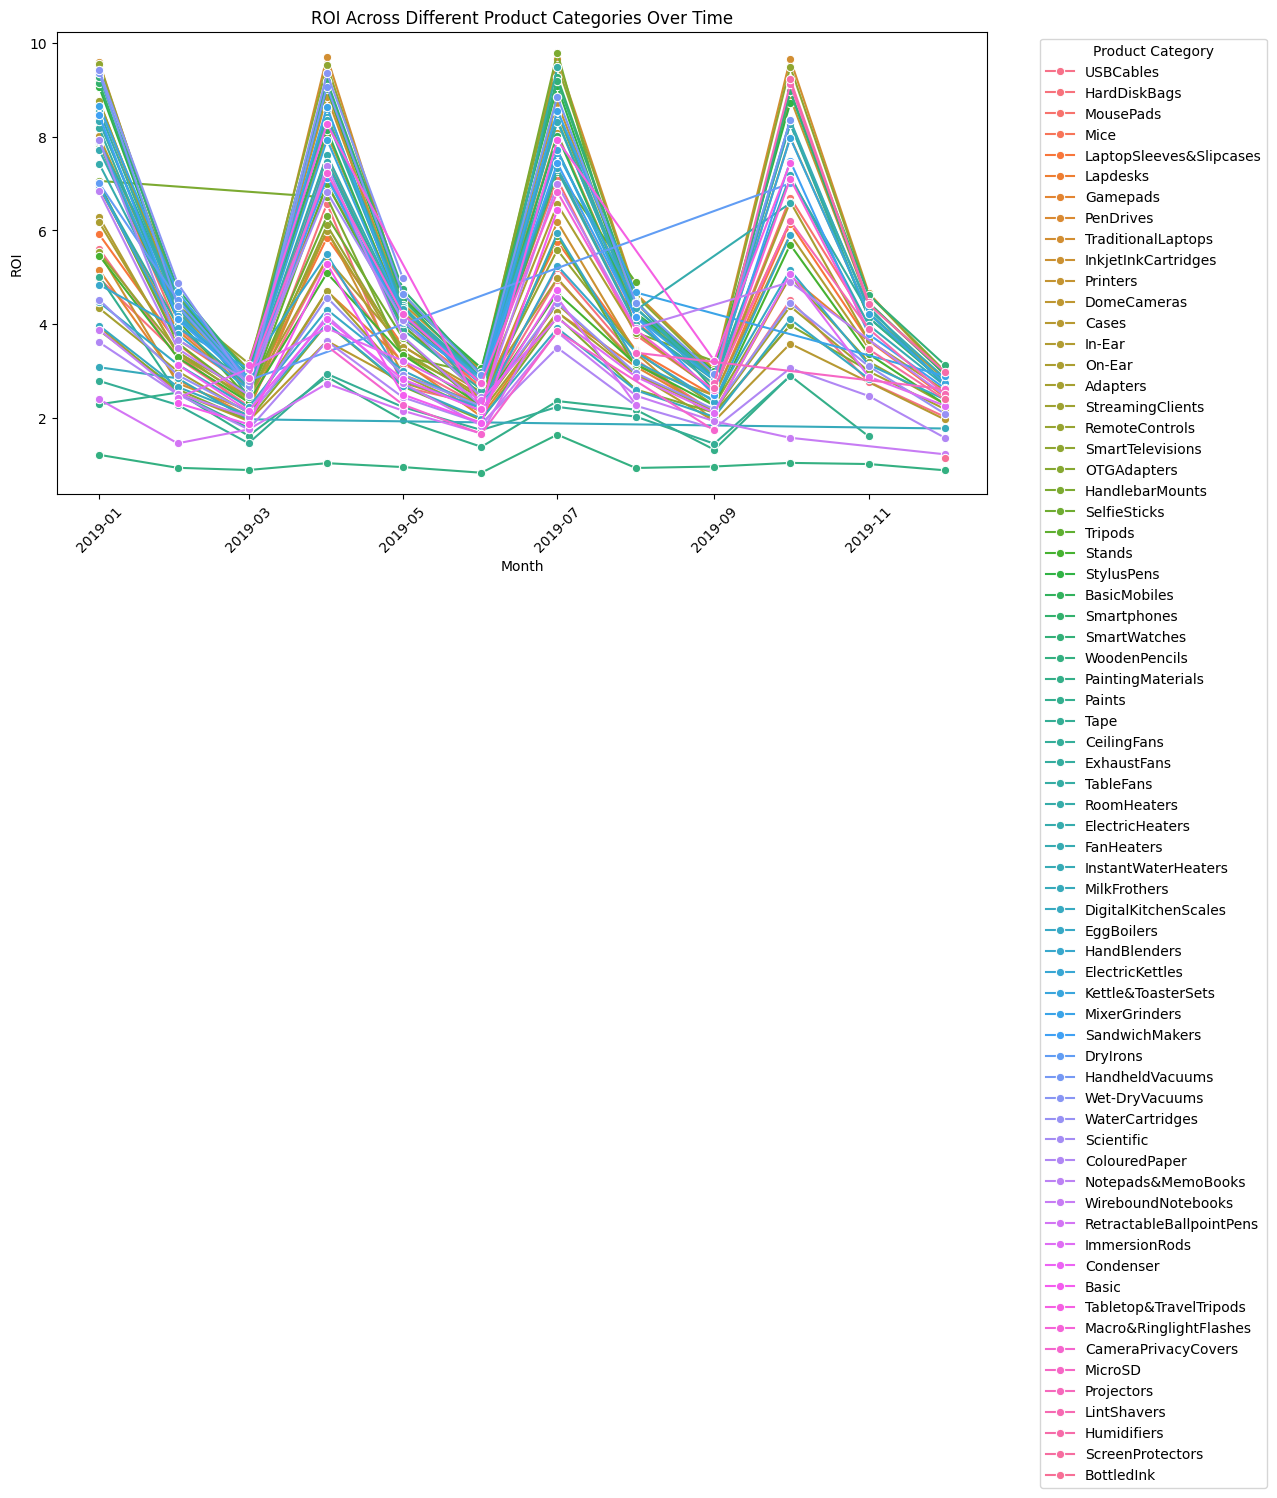

In [12]:
# Visualize ROI across months with the simplified category names
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_month_category, x='month', y='ROI', hue='short_category', marker='o')

plt.title('ROI Across Different Product Categories Over Time')
plt.xlabel('Month')
plt.ylabel('ROI')
plt.xticks(rotation=45)

plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [13]:
# Calculate the mean ROI for each short_category
category_roi = sales_by_month_category.groupby('short_category')['ROI'].mean().reset_index()

# Identify the top 5 and bottom 5 categories based on average ROI
top_5_categories = category_roi.nlargest(5, 'ROI')['short_category'].tolist()
bottom_5_categories = category_roi.nsmallest(5, 'ROI')['short_category'].tolist()

# Filter the sales_by_month_category data to include only the top 5 and bottom 5 categories
filtered_data = sales_by_month_category[sales_by_month_category['short_category'].isin(top_5_categories + bottom_5_categories)]

filtered_data

,month,category,revenue,discounted_revenue,discount_cost,ROI,short_category
5,2019-01-01,Computers&Accessories|Accessories&Peripherals|...,874.530,787.077,87.453,8.761801,Lapdesks
8,2019-01-01,Computers&Accessories|Laptops|TraditionalLaptops,287903.208,272954.664,30328.296,9.593381,TraditionalLaptops
24,2019-01-01,Electronics|Mobiles&Accessories|MobileAccessor...,35095.125,32395.500,3599.500,9.062868,StylusPens
28,2019-01-01,Home&Kitchen|CraftMaterials|DrawingMaterials|D...,8.330,7.497,0.833,1.206617,WoodenPencils
29,2019-01-01,Home&Kitchen|CraftMaterials|PaintingMaterials,42.780,39.744,4.416,2.284858,PaintingMaterials
...,...,...,...,...,...,...,...
567,2019-11-01,Home&Kitchen|CraftMaterials|DrawingMaterials|D...,14.518,12.376,3.094,1.009727,WoodenPencils
568,2019-11-01,Home&Kitchen|CraftMaterials|PaintingMaterials,14.904,13.248,3.312,1.600515,PaintingMaterials
585,2019-12-01,Computers&Accessories|Laptops|TraditionalLaptops,478928.352,374791.620,160624.980,2.909809,TraditionalLaptops
599,2019-12-01,Home&Kitchen|CraftMaterials|DrawingMaterials|D...,1.190,0.833,0.357,0.876934,WoodenPencils


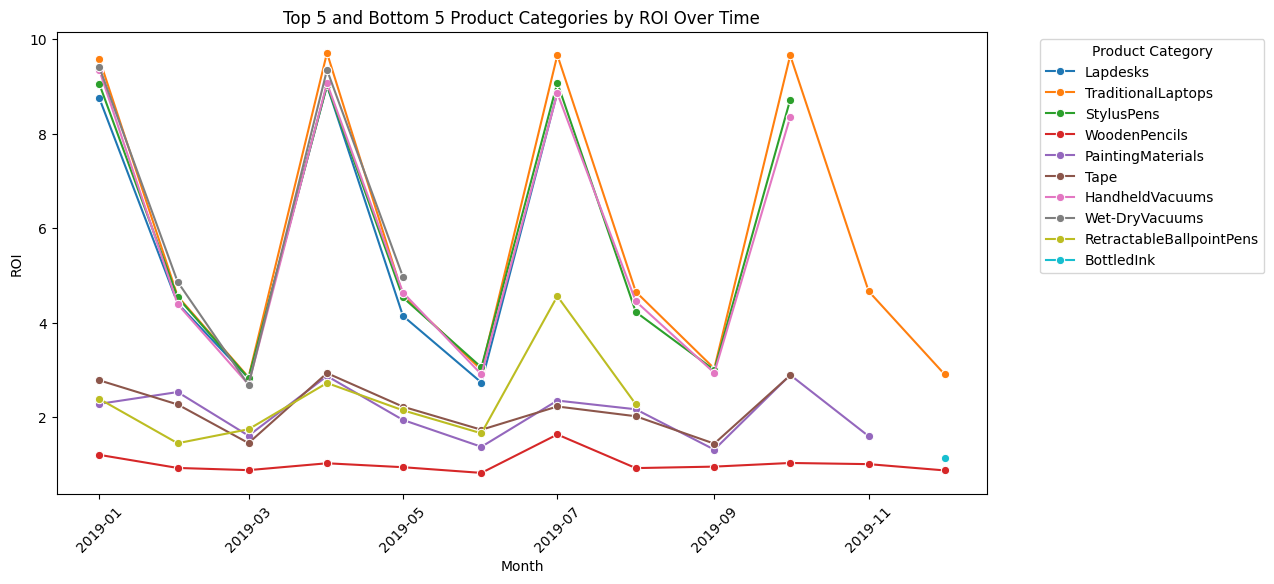

In [14]:
# Visualize ROI across months for the top 5 and bottom 5 categories
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='month', y='ROI', hue='short_category', marker='o')

plt.title('Top 5 and Bottom 5 Product Categories by ROI Over Time')
plt.xlabel('Month')
plt.ylabel('ROI')
plt.xticks(rotation=45)

plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Observation:
1. Seasonal Peaks: There are noticeable spikes in ROI at regular intervals, especially for the top-performing categories. These peaks occur roughly every two to three months, suggesting that certain marketing strategies or seasonal factors (such as promotions, holidays, or special events) are driving higher ROI during these periods.
2. Consistency in High ROI Categories: Some categories, like "TraditionalLaptops" and "Lapdesks," consistently show high ROI across all months, peaking significantly higher during these seasonal spikes. This could indicate strong customer demand or effective promotional strategies for these categories.
3. Low ROI Categories: The bottom 5 categories, such as "WoodenPencils" and "BottledInk," maintain consistently low ROI values throughout the observed period. This may suggest that these categories face low demand, lack effective promotional strategies, or have lower margins compared to other products.

### Analysis of ROI Across Different Marketing Channels

Research: </br>
</br>
Articles referenced: 
1. https://doi.org/10.54097/fbem.v7i3.5599
2. https://businessmodelanalyst.com/amazon-marketing-strategy/
3. https://ahrefs.com/blog/marketing-channels/
4. https://www.hubspot.com/marketing-statistics
5. https://blog.hubspot.com/marketing/marketing-channels 

Based on Amazon's typical marketing strategies, we could use the following channels:
- Amazon Search Ads – Amazon's own PPC advertising.
- Email Campaign – Targeted email promotions to engage customers.
- Affiliate Program – Partnerships with external websites and influencers to drive traffic.
- Amazon Display Ads – Banner ads within and outside the Amazon platform.
- SEO – Optimization for Amazon search and external search engines.
- Influencer Marketing – Collaborations with influencers, especially on social media platforms.
- Video Ads (Amazon OTT) – Video advertising on Amazon Fire TV and Twitch.
- Referral Program – Incentives for customers to refer others.
- Sponsored Brands – Ads that feature brands to enhance visibility on Amazon.
- Deals and Coupons – Promotional discounts offered on Amazon.


In [15]:
# Generating Synthetic Data

# List of Amazon marketing channels
amazon_marketing_channels = [
    'Amazon Search Ads', 'Email Campaign', 'Affiliate Program', 'Amazon Display Ads',
    'SEO', 'Influencer Marketing', 'Video Ads (Amazon OTT)', 'Referral Program',
    'Sponsored Brands', 'Deals and Coupons'
]

# Generate synthetic marketing channel data for each transaction
np.random.seed(42)
sales_data['marketing_channel'] = np.random.choice(amazon_marketing_channels, size=len(sales_data))

sales_data

,user_id,transaction_id,date,product_id,Quantity,Delivery_Charges,Coupon_Status,Coupon_Code,Discount_pct,product_name,...,category,actual_price,origin_area,discounted_price,revenue,discounted_revenue,discount_cost,ROI,month,marketing_channel
0,17850,16679,2019-01-01,B09DL9978Y,1,6.50,Used,ELEC10,0.1,Hindware Atlantic Compacto 3 Litre Instant wat...,...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",55.08,"Huizhou, China",49.572,49.572,49.572,5.508,7.617087,2019-01,Video Ads (Amazon OTT)
1,17850,16680,2019-01-01,B09DL9978Y,1,6.50,Used,ELEC10,0.1,Hindware Atlantic Compacto 3 Litre Instant wat...,...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",55.08,"Huizhou, China",49.572,49.572,49.572,5.508,7.617087,2019-01,Amazon Display Ads
2,17850,16681,2019-01-01,B07GXHC691,1,6.50,Used,OFF10,0.1,STRIFF PS2_01 Multi Angle Mobile/Tablet Tablet...,...,Electronics|Mobiles&Accessories|MobileAccessor...,5.99,"Guangzhou, China",5.391,5.391,5.391,0.599,3.371482,2019-01,Referral Program
3,17850,16682,2019-01-01,B08NCKT9FG,5,6.50,Not Used,SALE10,0.1,Boat A 350 Type C Cable 1.5m(Jet Black),...,Computers&Accessories|Accessories&Peripherals|...,9.58,"Shenzhen, China",8.622,47.900,43.110,4.790,8.272884,2019-01,SEO
4,17850,16682,2019-01-01,B08H21B6V7,1,6.50,Used,AIO10,0.1,Nokia 150 (2020) (Cyan),...,Electronics|Mobiles&Accessories|Smartphones&Ba...,35.99,"Taichung City, Taiwan",32.391,32.391,32.391,3.599,7.043053,2019-01,Video Ads (Amazon OTT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53696,14410,48493,2019-12-31,B07XLML2YS,1,6.50,Not Used,ELEC30,0.3,TP-Link Tapo 360° 2MP 1080p Full HD Pan/Tilt H...,...,Electronics|Cameras&Photography|SecurityCamera...,39.59,"Higashiomi-shi, Japan",27.713,39.590,27.713,11.877,3.074474,2019-12,Amazon Display Ads
53697,14410,48494,2019-12-31,B09WN3SRC7,1,6.50,Used,SALE30,0.3,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,...,"Electronics|HomeTheater,TV&Video|Televisions|S...",1678.80,"Dongguan, China",1175.160,1175.160,1175.160,503.640,2.328710,2019-12,Referral Program
53698,14410,48495,2019-12-31,B07VX71FZP,1,6.50,Used,ELEC30,0.3,Amazon Brand - Solimo 2000/1000 Watts Room Hea...,...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",24.00,"Ningbo, China",16.800,16.800,16.800,7.200,2.048780,2019-12,Influencer Marketing
53699,14600,48496,2019-12-31,B00Y4ORQ46,5,6.50,Not Used,ELEC30,0.3,Logitech H111 Wired On Ear Headphones With Mic...,...,"Electronics|Headphones,Earbuds&Accessories|Hea...",9.54,"Ningbo, China",6.678,47.700,33.390,14.310,3.115611,2019-12,Amazon Search Ads


Justification:

As Amazon’s channel effectiveness can vary significantly based on visibility, engagement rates, and cost efficiency, to adjust the synthetic data generation to better reflect Amazon’s actual marketing channels and realistic effectiveness, multipliers will be used in the ROI modelling based on the articles referenced. Multipliers can reflect the varying effectiveness of each marketing channel, as different channels inherently yield different returns (For example, Amazon Search Ads are often more effective than display ads). However, the synthetic generation of multipliers involves assumptions as we do not have specific performance data from Amazon.

- Amazon Search Ads: Multiplier of 1.4 as they provide high visibility to shoppers with intent to purchase.
- Email Campaign: Multiplier of 1.3 for targeted engagement, although less visible than search ads.
- Affiliate Program: Multiplier of 1.1 since it drives traffic from external sources with varying conversion rates.
- Amazon Display Ads: Multiplier of 0.8 because display ads tend to have lower engagement compared to direct search.
- SEO: Multiplier of 1.5 as organic visibility can yield long-term returns without additional spending.
- Influencer Marketing: Multiplier of 1.2 for brand awareness, effective in reaching wider audiences.
- Video Ads (Amazon OTT): Multiplier of 1.1 as video ads can engage audiences but vary in effectiveness.
- Referral Program: Multiplier of 1.6, as referral programs often yield high conversion rates from trusted recommendations.
- Sponsored Brands: Multiplier of 1.3, as these ads enhance brand presence and are highly visible on the platform.
- Deals and Coupons: Multiplier of 0.9, as discounts attract price-sensitive buyers but may not lead to loyal customers.

In [16]:
# Define base multipliers for each marketing channel
base_channel_effectiveness = {
    'Amazon Search Ads': 1.4,
    'Email Campaign': 1.3,
    'Affiliate Program': 1.1,
    'Amazon Display Ads': 0.8,
    'SEO': 1.5,
    'Influencer Marketing': 1.2,
    'Video Ads (Amazon OTT)': 1.1,
    'Referral Program': 1.6,
    'Sponsored Brands': 1.3,
    'Deals and Coupons': 0.9
}

# Variability range (±10% of the base multiplier)
variability_range = 0.1

# Set random seed for reproducibility, to be removed when running the code
np.random.seed(42)

# Function to apply random variability to the base multiplier
def apply_random_multiplier(base_multiplier):
    random_variability = np.random.uniform(-variability_range, variability_range)
    adjusted_multiplier = base_multiplier * (1 + random_variability)
    return adjusted_multiplier

# Apply the adjusted multiplier to ROI for each row
sales_data['ROI_adjusted'] = sales_data.apply(
    lambda row: row['ROI'] * apply_random_multiplier(base_channel_effectiveness[row['marketing_channel']]),
    axis=1
)

print(sales_data[['product_name', 'Quantity', 'revenue', 'discount_cost', 'marketing_channel', 'ROI', 'ROI_adjusted']].head())

                                        product_name  Quantity  revenue  \
0  Hindware Atlantic Compacto 3 Litre Instant wat...         1   49.572   
1  Hindware Atlantic Compacto 3 Litre Instant wat...         1   49.572   
2  STRIFF PS2_01 Multi Angle Mobile/Tablet Tablet...         1    5.391   
3            Boat A 350 Type C Cable 1.5m(Jet Black)         5   47.900   
4                            Nokia 150 (2020) (Cyan)         1   32.391   

   discount_cost       marketing_channel       ROI  ROI_adjusted  
0          5.508  Video Ads (Amazon OTT)  7.617087      8.168555  
1          5.508      Amazon Display Ads  7.617087      6.642970  
2          0.599        Referral Program  3.371482      5.644664  
3          4.790                     SEO  8.272884     12.654183  
4          3.599  Video Ads (Amazon OTT)  7.043053      7.214369  


In [17]:
# Group by marketing channel to analyze non-adjusted ROI
channel_roi = sales_data.groupby('marketing_channel').agg(
    avg_ROI=('ROI', 'mean'),                 # Calculate average of non-adjusted ROI
    avg_ROI_adjusted=('ROI_adjusted', 'mean') # Calculate average of adjusted ROI
).reset_index()

channel_roi_non_adjusted = channel_roi.sort_values(by='avg_ROI', ascending=False)

channel_roi_non_adjusted

,marketing_channel,avg_ROI,avg_ROI_adjusted
7,SEO,4.489506,6.733808
0,Affiliate Program,4.482835,4.930483
3,Deals and Coupons,4.470063,4.024334
4,Email Campaign,4.456690,5.785787
1,Amazon Display Ads,4.447359,3.559992
6,Referral Program,4.444160,7.112263
8,Sponsored Brands,4.432363,5.747591
2,Amazon Search Ads,4.421146,6.180447
9,Video Ads (Amazon OTT),4.415890,4.861046
5,Influencer Marketing,4.414651,5.298370


/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/1179871026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


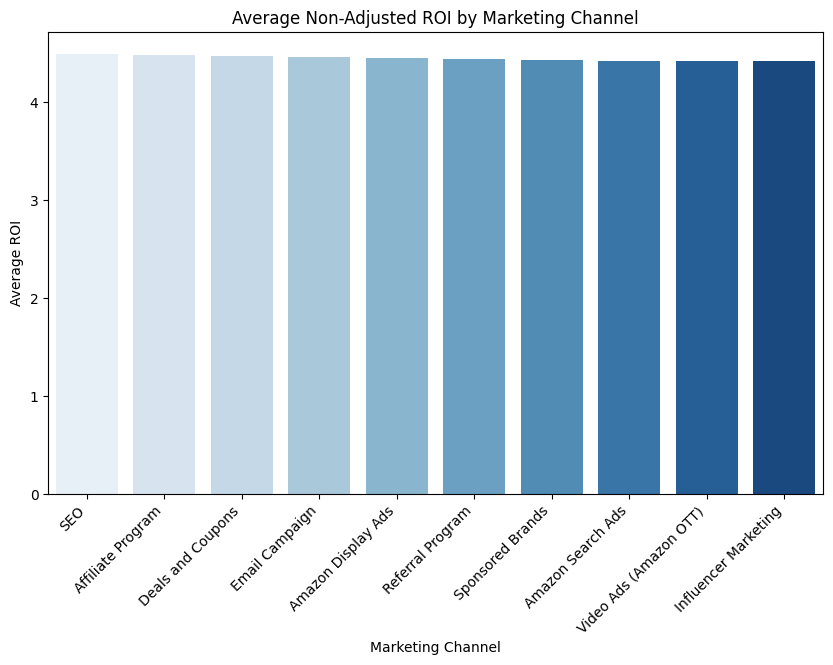

In [18]:
# Plot non-adjusted ROI
plt.figure(figsize=(10, 6))
sns.barplot(
    data=channel_roi_non_adjusted,
    x='marketing_channel',
    y='avg_ROI',
    palette='Blues',
    order=channel_roi_non_adjusted['marketing_channel']  # Set the order of x-axis labels explicitly
)
plt.title('Average Non-Adjusted ROI by Marketing Channel')
plt.ylabel('Average ROI')
plt.xlabel('Marketing Channel')
plt.xticks(rotation=45, ha='right')

plt.show()

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/3307602010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


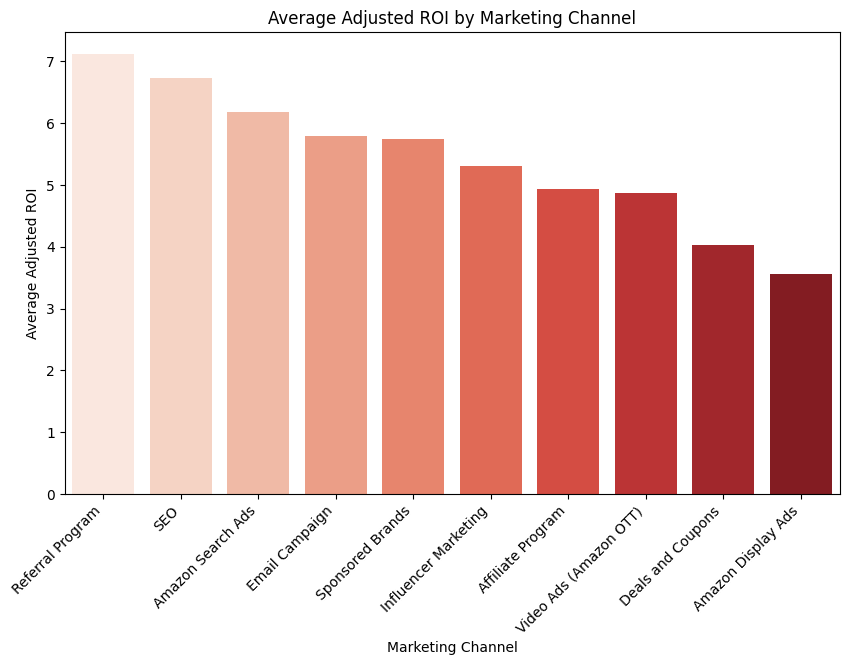

In [19]:
# Group by marketing channel to analyze adjusted ROI
channel_roi_adjusted = channel_roi.sort_values(by='avg_ROI_adjusted', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=channel_roi_adjusted,
    x='marketing_channel',
    y='avg_ROI_adjusted',
    palette='Reds',
    order=channel_roi_adjusted['marketing_channel']  # Set the order of x-axis labels explicitly
)
plt.title('Average Adjusted ROI by Marketing Channel')
plt.ylabel('Average Adjusted ROI')
plt.xlabel('Marketing Channel')
plt.xticks(rotation=45, ha='right')

plt.show()

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/1046390667.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/1046390667.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


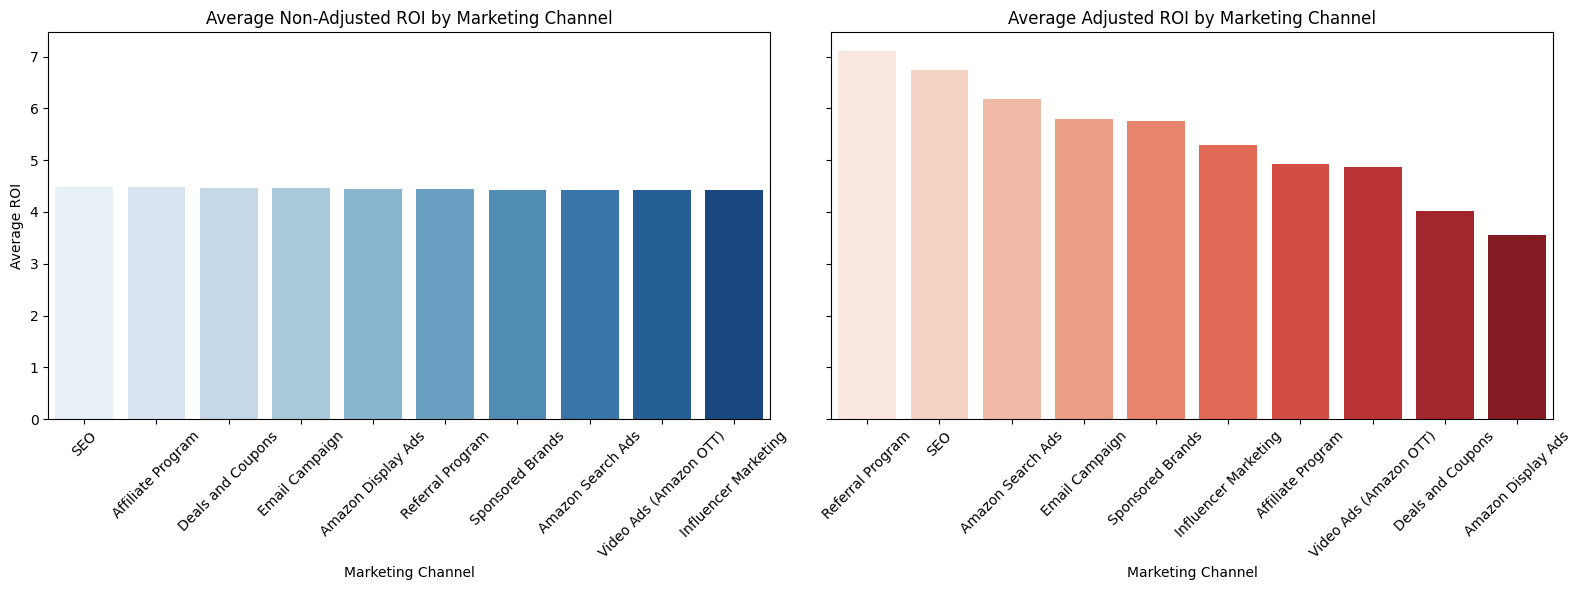

In [20]:
channel_roi_non_adjusted = channel_roi.sort_values(by='avg_ROI', ascending=False)
channel_roi_adjusted = channel_roi.sort_values(by='avg_ROI_adjusted', ascending=False)

# Placing subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.barplot(
    data=channel_roi_non_adjusted,
    x='marketing_channel',
    y='avg_ROI',
    palette='Blues',
    order=channel_roi_non_adjusted['marketing_channel'],
    ax=axes[0]  # Specify the first subplot
)
axes[0].set_title('Average Non-Adjusted ROI by Marketing Channel')
axes[0].set_ylabel('Average ROI')
axes[0].set_xlabel('Marketing Channel')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    data=channel_roi_adjusted,
    x='marketing_channel',
    y='avg_ROI_adjusted',
    palette='Reds',
    order=channel_roi_adjusted['marketing_channel'],
    ax=axes[1]  # Specify the second subplot
)
axes[1].set_title('Average Adjusted ROI by Marketing Channel')
axes[1].set_ylabel('Average Adjusted ROI')
axes[1].set_xlabel('Marketing Channel')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Analysis of Seasonality Effects on ROI across Different Marketing Channels

Research:

Articles Referenced:
1. https://www.amazon.science/publications/seasonal-relevance-in-e-commerce-search
2. https://www.optimizon.co.uk/amazon-knowhow/importance-seasonality-updates-ecommerce-marketplaces/
3. https://advertising.amazon.com/library/guides/global-shopping-events

Based on the articles, seasonality is critical for Amazon marketing because consumer behavior, purchasing patterns, and demand vary significantly at different times of the year. Amazon adjusts its marketing strategies based on seasonality in various ways to maximize engagement, traffic, and sales. Some major occasions include holidays (Thanksgiving - Black Friday and Cyber Monday, Christmas) from November to December, Back-to-School sales from August to September and Summer Sales (Amazon Prime Day, Memorial Day, Labour Day and Summer Vacation) from June to July.


In [21]:
# Analysing Seasonality Effects
# Define seasonality multipliers for Amazon events
seasonality_multipliers = {
    'Holiday': {  # e.g., Black Friday, Cyber Monday
        'Amazon Search Ads': 1.5,
        'Email Campaign': 1.3,
        'Affiliate Program': 1.2,
        'Amazon Display Ads': 1.6,
        'Influencer Marketing': 1.4
    },
    'Back-to-School': {  # e.g., August, September
        'SEO': 1.3,
        'Content Marketing - Blog': 1.2,
        'Amazon Search Ads': 1.4,
        'Sponsored Brands': 1.2
    },
    'Summer Sales': {  # e.g., Prime Day, Memorial Day
        'Email Campaign': 1.4,
        'Social Media - Instagram': 1.5,
        'Referral Program': 1.3,
        'Video Ads (Amazon OTT)': 1.2
    }
}

# Define the months that correspond to each season
seasonality_periods = {
    'Holiday': ['11', '12'],          # November, December
    'Back-to-School': ['08', '09'],   # August, September
    'Summer Sales': ['06', '07'],     # June, July
}

In [22]:
def apply_seasonality_multiplier(row):
    month = row['date'].strftime('%m') 
    for event, months in seasonality_periods.items():
        if month in months:
            multiplier = seasonality_multipliers.get(event, {}).get(row['marketing_channel'], 1)
            return row['ROI_adjusted'] * multiplier  # Adjusted ROI for the season
    return row['ROI_adjusted']  # Default to original ROI if no seasonal adjustment


sales_data['ROI_seasonal_adjusted'] = sales_data.apply(apply_seasonality_multiplier, axis=1)
sales_data[['date', 'marketing_channel', 'ROI', 'ROI_adjusted', 'ROI_seasonal_adjusted']].head()

,date,marketing_channel,ROI,ROI_adjusted,ROI_seasonal_adjusted
0,2019-01-01,Video Ads (Amazon OTT),7.617087,8.168555,8.168555
1,2019-01-01,Amazon Display Ads,7.617087,6.642970,6.642970
2,2019-01-01,Referral Program,3.371482,5.644664,5.644664
3,2019-01-01,SEO,8.272884,12.654183,12.654183
4,2019-01-01,Video Ads (Amazon OTT),7.043053,7.214369,7.214369


In [23]:
sales_data['year_month'] = sales_data['date'].dt.to_period('M').astype(str)
seasonal_roi = sales_data.groupby(['year_month', 'marketing_channel']).agg(
    avg_ROI_seasonal_adjusted=('ROI_seasonal_adjusted', 'mean')
).reset_index()

# For proper x-axis plotting
seasonal_roi['year_month'] = pd.to_datetime(seasonal_roi['year_month'], format='%Y-%m')

seasonal_roi

,year_month,marketing_channel,avg_ROI_seasonal_adjusted
0,2019-01-01,Affiliate Program,7.797761
1,2019-01-01,Amazon Display Ads,5.621306
2,2019-01-01,Amazon Search Ads,10.137930
3,2019-01-01,Deals and Coupons,6.384921
4,2019-01-01,Email Campaign,9.443176
...,...,...,...
115,2019-12-01,Influencer Marketing,4.515132
116,2019-12-01,Referral Program,4.281129
117,2019-12-01,SEO,3.997696
118,2019-12-01,Sponsored Brands,3.452579


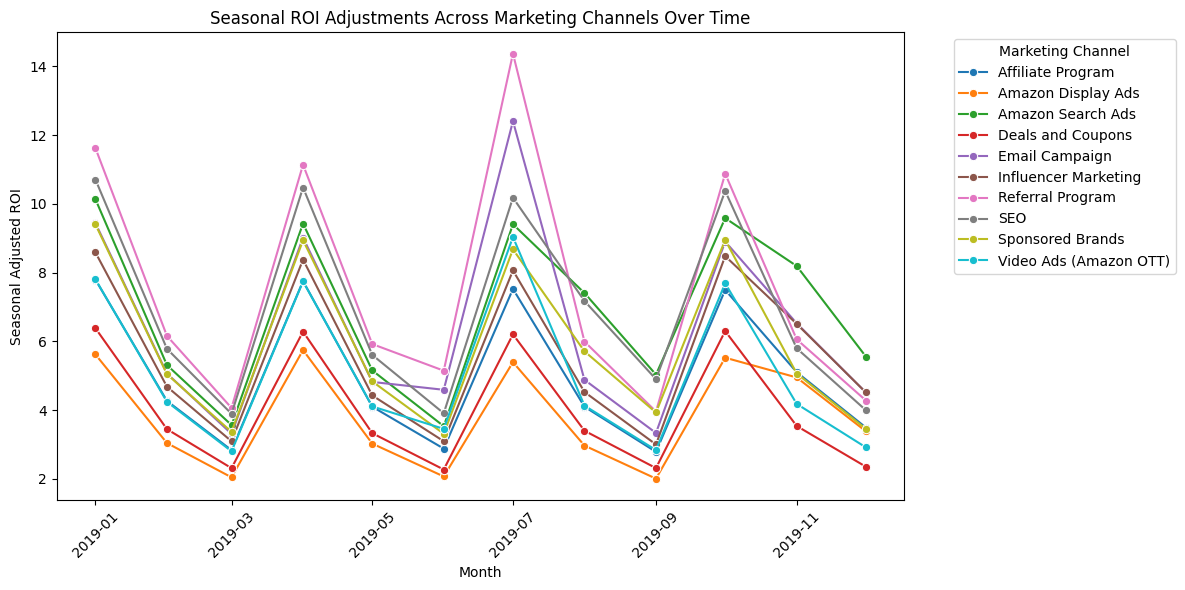

In [24]:
# Visualize seasonal effects on marketing channels
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=seasonal_roi,
    x='year_month',
    y='avg_ROI_seasonal_adjusted',
    hue='marketing_channel',
    marker='o'
)
plt.title('Seasonal ROI Adjustments Across Marketing Channels Over Time')
plt.xlabel('Month')
plt.ylabel('Seasonal Adjusted ROI')
plt.xticks(rotation=45)
plt.legend(title='Marketing Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Observation: 
1. The chart highlights a significant mid-year spike in ROI for most marketing channels, with Email Campaign and Referral Program being the top performers. This indicates that these channels might be leveraged more heavily during peak promotion periods like summer sales. This corresponds to the articles that were referenced. 
2. Cyclical nature of the graph shows that there are specific periods where demands surges and Amazon can look into further boosting demands during these periods and also look into investing more into effective marketing channels during periods that saw dips in ROI.
3. The downward trend after the holiday season at the end of the year suggests a potential reduction in marketing effectiveness in the early periods of the year, signaling the need for optimized strategies during that time. The early part of the year, while stable, may also benefit from targeted campaigns to boost ROI. This analysis can help in planning marketing strategies, optimizing campaign timing, and selecting the most effective channels to maximize ROI throughout the year.

### Analysis of ROI across Different Marketing Channel using Customer Segmentation

In [25]:
# Customer segmentation using K-means clustering
clustering_data = sales_data[['ROI_seasonal_adjusted', 'marketing_channel', 'Quantity', 'Coupon_Status']]

encoder = OneHotEncoder()
encoded_channels = pd.DataFrame(
    encoder.fit_transform(clustering_data[['marketing_channel', 'Coupon_Status']]).toarray(),
    columns=encoder.get_feature_names_out()
)

clustering_data = pd.concat([clustering_data[['ROI_seasonal_adjusted', 'Quantity']], encoded_channels], axis=1)

# Data cleaning
clustering_data.fillna(0, inplace=True)

# Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_data)

print(pd.DataFrame(scaled_features, columns=clustering_data.columns).head())

   ROI_seasonal_adjusted  Quantity  marketing_channel_Affiliate Program  \
0               0.749363 -0.173609                            -0.331638   
1               0.283916 -0.173609                            -0.331638   
2              -0.020662 -0.173609                            -0.331638   
3               2.117904  0.026675                            -0.331638   
4               0.458246 -0.173609                            -0.331638   

   marketing_channel_Amazon Display Ads  marketing_channel_Amazon Search Ads  \
0                             -0.334088                             -0.33046   
1                              2.993223                             -0.33046   
2                             -0.334088                             -0.33046   
3                             -0.334088                             -0.33046   
4                             -0.334088                             -0.33046   

   marketing_channel_Deals and Coupons  marketing_channel_Email Camp

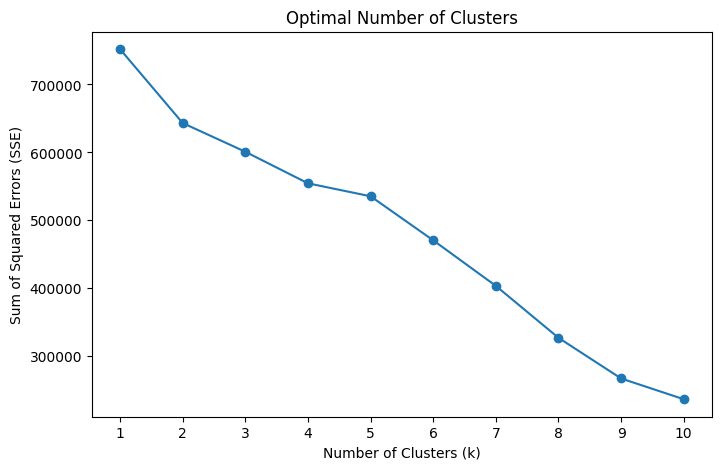

In [26]:
# Finding the optimal number of clusters
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_) 

plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.title('Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.show()

Conclusion:
The "elbow" of the curve is where the rate of decrease in SSE slows down significantly. This point suggests the optimal number of clusters. In this case, the elbow appears to occur at 3 or 4 clusters, as the SSE decreases more gradually after this point. Choosing 3 or 4 clusters would balance between having a good clustering structure (lower SSE) and avoiding overfitting by adding too many clusters.

In [27]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=7)
clustering_data['cluster'] = kmeans.fit_predict(scaled_features)

sales_data_with_segments = sales_data.copy()
sales_data_with_segments['customer_segment'] = clustering_data['cluster']

print(sales_data_with_segments[['customer_segment', 'ROI_seasonal_adjusted', 'marketing_channel', 'Quantity', 'Coupon_Status']].head())

   customer_segment  ROI_seasonal_adjusted       marketing_channel  Quantity  \
0                 1               8.168555  Video Ads (Amazon OTT)         1   
1                 1               6.642970      Amazon Display Ads         1   
2                 1               5.644664        Referral Program         1   
3                 2              12.654183                     SEO         5   
4                 1               7.214369  Video Ads (Amazon OTT)         1   

  Coupon_Status  
0          Used  
1          Used  
2          Used  
3      Not Used  
4          Used  


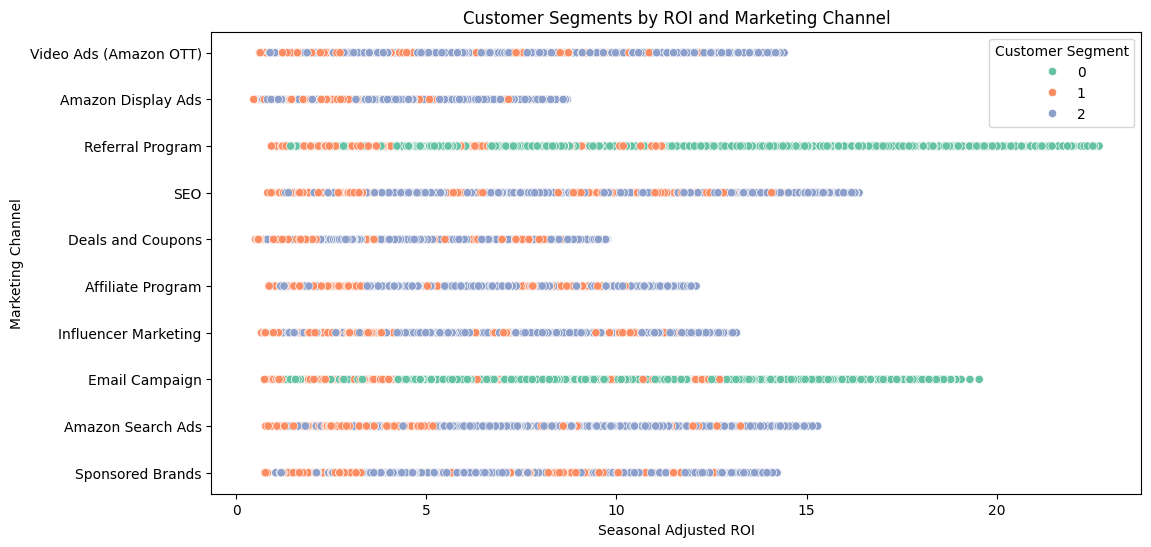

In [28]:
# Plot the clusters based on ROI and Marketing Channel
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sales_data_with_segments, x='ROI_seasonal_adjusted', y='marketing_channel', hue='customer_segment', palette='Set2')
plt.title('Customer Segments by ROI and Marketing Channel')
plt.xlabel('Seasonal Adjusted ROI')
plt.ylabel('Marketing Channel')
plt.legend(title='Customer Segment')
plt.show()

Observations:
1. Segment 0: This segment appears consistently across almost all channels, especially those with higher Seasonal Adjusted ROI values. This could represent customers who respond similarly to different marketing channels, possibly indicating a broad but stable customer profile. Segment 1 and Segment 2: These segments show up in most channels but are more varied in density across channels. Segment 1, for example, appears more frequently in channels like "SEO" and "Referral Program," while Segment 2 has a stronger presence in channels like "Amazon Display Ads" and "Deals and Coupons." This may suggest different engagement levels or preferences among customer segments for specific marketing channels.
2. Some marketing channels, such as "Video Ads (Amazon OTT)" and "Amazon Display Ads," have a broader spread of ROI values. This could indicate that these channels are more variable in their performance, potentially due to seasonal effects or varying levels of customer engagement.

Potential Marketing Strategies:
- Channels with a high concentration of a particular segment could be optimized or further personalized for that segment’s behavior. For example, email campaigns has a strong representation by segment 0.
- Channels with diverse segment representation may benefit from differentiated approaches to meet the needs of each segment. For example, SEO has a strong mix of all segments, possibly reflecting the organic nature of this channel, which attracts a wide range of customer types.

### Multinomial Logistic Regression for Analysis of Channel Preferences

In [29]:
sales_data = sales_data.merge(users[['user_id', 'age', 'gender']], on='user_id', how='left')

sales_data

,user_id,transaction_id,date,product_id,Quantity,Delivery_Charges,Coupon_Status,Coupon_Code,Discount_pct,product_name,...,discounted_revenue,discount_cost,ROI,month,marketing_channel,ROI_adjusted,ROI_seasonal_adjusted,year_month,age,gender
0,17850,16679,2019-01-01,B09DL9978Y,1,6.50,Used,ELEC10,0.1,Hindware Atlantic Compacto 3 Litre Instant wat...,...,49.572,5.508,7.617087,2019-01,Video Ads (Amazon OTT),8.168555,8.168555,2019-01,33,Female
1,17850,16680,2019-01-01,B09DL9978Y,1,6.50,Used,ELEC10,0.1,Hindware Atlantic Compacto 3 Litre Instant wat...,...,49.572,5.508,7.617087,2019-01,Amazon Display Ads,6.642970,6.642970,2019-01,33,Female
2,17850,16681,2019-01-01,B07GXHC691,1,6.50,Used,OFF10,0.1,STRIFF PS2_01 Multi Angle Mobile/Tablet Tablet...,...,5.391,0.599,3.371482,2019-01,Referral Program,5.644664,5.644664,2019-01,33,Female
3,17850,16682,2019-01-01,B08NCKT9FG,5,6.50,Not Used,SALE10,0.1,Boat A 350 Type C Cable 1.5m(Jet Black),...,43.110,4.790,8.272884,2019-01,SEO,12.654183,12.654183,2019-01,33,Female
4,17850,16682,2019-01-01,B08H21B6V7,1,6.50,Used,AIO10,0.1,Nokia 150 (2020) (Cyan),...,32.391,3.599,7.043053,2019-01,Video Ads (Amazon OTT),7.214369,7.214369,2019-01,33,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53696,14410,48493,2019-12-31,B07XLML2YS,1,6.50,Not Used,ELEC30,0.3,TP-Link Tapo 360° 2MP 1080p Full HD Pan/Tilt H...,...,27.713,11.877,3.074474,2019-12,Amazon Display Ads,2.624108,4.198573,2019-12,19,Female
53697,14410,48494,2019-12-31,B09WN3SRC7,1,6.50,Used,SALE30,0.3,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,...,1175.160,503.640,2.328710,2019-12,Referral Program,3.687050,3.687050,2019-12,19,Female
53698,14410,48495,2019-12-31,B07VX71FZP,1,6.50,Used,ELEC30,0.3,Amazon Brand - Solimo 2000/1000 Watts Room Hea...,...,16.800,7.200,2.048780,2019-12,Influencer Marketing,2.481858,3.474601,2019-12,19,Female
53699,14600,48496,2019-12-31,B00Y4ORQ46,5,6.50,Not Used,ELEC30,0.3,Logitech H111 Wired On Ear Headphones With Mic...,...,33.390,14.310,3.115611,2019-12,Amazon Search Ads,4.100144,6.150215,2019-12,20,Male


In [30]:
sales_data['year_month'] = sales_data['date'].dt.to_period('M').astype(str)

y = sales_data['marketing_channel']
X = sales_data[['age', 'gender', 'year_month', 'Coupon_Status', 'Quantity', 'Discount_pct']]

# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False)  
encoded_features = encoder.fit_transform(X[['Coupon_Status', 'gender', 'year_month']])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
X = pd.concat([X[['age', 'Quantity', 'Discount_pct']].reset_index(drop=True), encoded_features_df.reset_index(drop=True)], axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the multinomial logistic regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/Users/wayne/Desktop/Passion8/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report:
                         precision    recall  f1-score   support

     Affiliate Program       0.10      0.11      0.11      1090
    Amazon Display Ads       0.11      0.11      0.11      1070
     Amazon Search Ads       0.07      0.03      0.04      1116
     Deals and Coupons       0.10      0.28      0.15      1078
        Email Campaign       0.09      0.06      0.07      1024
  Influencer Marketing       0.11      0.10      0.11      1060
      Referral Program       0.10      0.09      0.09      1059
                   SEO       0.10      0.13      0.11      1086
      Sponsored Brands       0.10      0.04      0.06      1059
Video Ads (Amazon OTT)       0.10      0.05      0.06      1099

              accuracy                           0.10     10741
             macro avg       0.10      0.10      0.09     10741
          weighted avg       0.10      0.10      0.09     10741

Confusion Matrix:
 [[121 105  48 286  61  92 121 163  49  44]
 [103 113  47 2

In [31]:
# Analyze feature importance
channel_labels = log_reg.classes_
feature_labels = X.columns
coef_df = pd.DataFrame(log_reg.coef_, columns=feature_labels, index=channel_labels)

coef_df.rename(columns={
    'age': 'Age',
    'Discount_pct': 'Discount Percentage',
    'Coupon_Status_Not Used': 'Coupon Status: Not Used',
    'Coupon_Status_Used': 'Coupon Status: Used',
    'gender_Male': 'Gender: Male',
    'gender_Female': 'Gender: Female',
    'year_month_2019-01': 'January 2019',
    'year_month_2019-02': 'February 2019',
    'year_month_2019-03': 'March 2019',
    'year_month_2019-04': 'April 2019',
    'year_month_2019-05': 'May 2019',
    'year_month_2019-06': 'June 2019',
    'year_month_2019-07': 'July 2019',
    'year_month_2019-08': 'August 2019',
    'year_month_2019-09': 'September 2019',
    'year_month_2019-10': 'October 2019',
    'year_month_2019-11': 'November 2019',
    'year_month_2019-12': 'December 2019'
}, inplace=True)

print("\nFeature Importance by Channel:\n", coef_df)


Feature Importance by Channel:
                              Age  Quantity  Discount Percentage  \
Affiliate Program      -0.038685 -0.002520            -0.008542   
Amazon Display Ads     -0.005598 -0.007956            -0.002163   
Amazon Search Ads      -0.011522 -0.019572             0.010156   
Deals and Coupons       0.010128  0.015460            -0.003373   
Email Campaign          0.000329  0.000905            -0.002505   
Influencer Marketing    0.013380  0.001101             0.014436   
Referral Program        0.001122 -0.010979            -0.007979   
SEO                     0.028337 -0.008770            -0.013190   
Sponsored Brands       -0.007280  0.016498             0.000174   
Video Ads (Amazon OTT)  0.009788  0.015833             0.012986   

                        Coupon Status: Not Used  Coupon Status: Used  \
Affiliate Program                      0.008345            -0.008345   
Amazon Display Ads                     0.006975            -0.006975   
Amazon Search

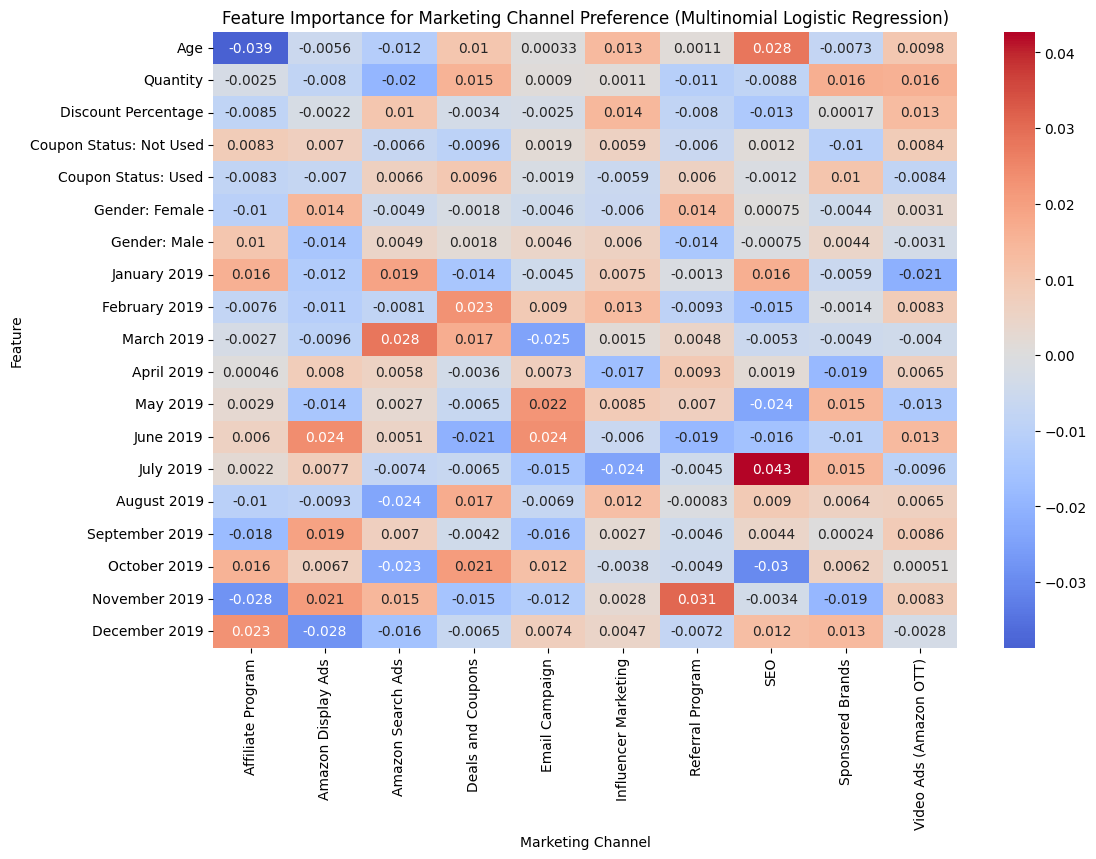

In [32]:
# Visualize the feature importance for each channel
plt.figure(figsize=(12, 8))
sns.heatmap(coef_df.T, annot=True, cmap="coolwarm", center=0)
plt.title('Feature Importance for Marketing Channel Preference (Multinomial Logistic Regression)')
plt.xlabel('Marketing Channel')
plt.ylabel('Feature')
plt.show()

Observation:
1. Influence of Demographics and Discounts: While Age and Discount Percentage seem to have some impact on certain channels, the effect is relatively small. This suggests that other unobserved factors may also be influencing channel preferences.
2. Seasonal Variability: Seasonal effects are evident, with certain months showing a stronger preference for specific channels, likely reflecting seasonal marketing strategies or customer shopping behavior patterns.
3. Coupon Usage: The response to coupon usage differs across channels, which could indicate that some channels are better suited for coupon-driven engagement than others.

The impact values are relatively small, suggesting that a non-linear model might capture more complex relationships.

### Random Forest Classifier for Analysis of Channel Preferences

In [33]:
# Implementing Random Forest Classfier
y = sales_data['marketing_channel'] 
X = sales_data[['age', 'gender', 'year_month', 'Coupon_Status', 'Quantity', 'Discount_pct']] 

encoder = OneHotEncoder(sparse_output=False)  
encoded_features = encoder.fit_transform(X[['gender', 'Coupon_Status', 'year_month']])
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
X = pd.concat([X[['age', 'Quantity', 'Discount_pct']].reset_index(drop=True), encoded_features_df.reset_index(drop=True)], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

feature_importances = rf_model.feature_importances_
features_list = X.columns
importance_df = pd.DataFrame({'Feature': features_list, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

rename_dict = {
    'age': 'Age',
    'Discount_pct': 'Discount Percentage',
    'Coupon_Status_Not Used': 'Coupon Status: Not Used',
    'Coupon_Status_Used': 'Coupon Status: Used',
    'gender_Male': 'Gender: Male',
    'gender_Female': 'Gender: Female',
    'year_month_2019-01': 'January 2019',
    'year_month_2019-02': 'February 2019',
    'year_month_2019-03': 'March 2019',
    'year_month_2019-04': 'April 2019',
    'year_month_2019-05': 'May 2019',
    'year_month_2019-06': 'June 2019',
    'year_month_2019-07': 'July 2019',
    'year_month_2019-08': 'August 2019',
    'year_month_2019-09': 'September 2019',
    'year_month_2019-10': 'October 2019',
    'year_month_2019-11': 'November 2019',
    'year_month_2019-12': 'December 2019'
}

importance_df['Feature'] = importance_df['Feature'].replace(rename_dict)
importance_df


,Feature,Importance
0,Age,0.589739
1,Quantity,0.325235
6,Coupon Status: Used,0.008924
5,Coupon Status: Not Used,0.008530
3,Gender: Female,0.007269
4,Gender: Male,0.007226
2,Discount Percentage,0.007009
14,August 2019,0.004982
17,November 2019,0.004220
11,May 2019,0.004186


/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/596122088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


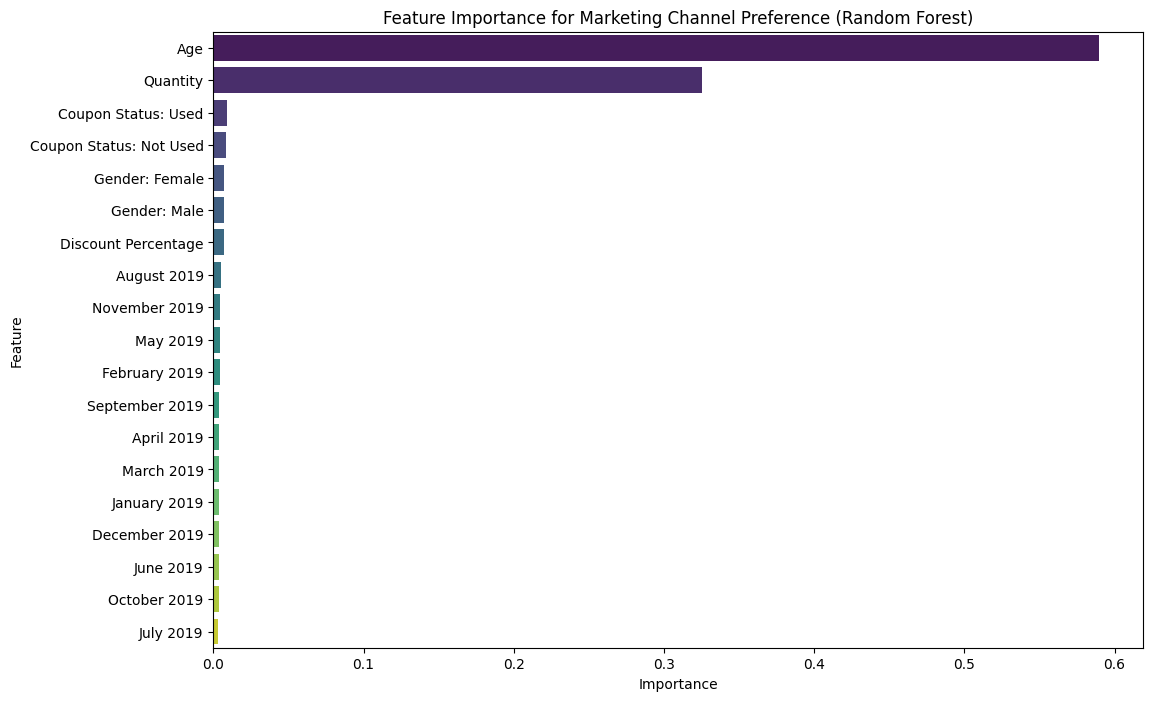

In [34]:
# Visualize the renamed feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance for Marketing Channel Preference (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Observation:
1. Age: Age significantly influences channel preference, showing that different demographics prefer different channels.
2. Quantity: Quantity is also an important feature. A higher quantity of items purchased could indicate high engagement with certain marketing channels (for example, bulk discounts might be promoted more on certain channels).
3. Coupon Status: Coupon usage has some impact but appears lower than age and quantity. This could mean that, while coupon usage impacts overall engagement, it might not be a strong predictor of specific channel preference.
4. Minimal Influence of temporal and demographic features. 

## 2. Analyze the impact of various promotional campaigns on sales.

### Analysis of the Impact of Different Promotional Campaigns on Sales

In [35]:
promo_sales_data = sales_data.copy()

promo_sales_data

,user_id,transaction_id,date,product_id,Quantity,Delivery_Charges,Coupon_Status,Coupon_Code,Discount_pct,product_name,...,discounted_revenue,discount_cost,ROI,month,marketing_channel,ROI_adjusted,ROI_seasonal_adjusted,year_month,age,gender
0,17850,16679,2019-01-01,B09DL9978Y,1,6.50,Used,ELEC10,0.1,Hindware Atlantic Compacto 3 Litre Instant wat...,...,49.572,5.508,7.617087,2019-01,Video Ads (Amazon OTT),8.168555,8.168555,2019-01,33,Female
1,17850,16680,2019-01-01,B09DL9978Y,1,6.50,Used,ELEC10,0.1,Hindware Atlantic Compacto 3 Litre Instant wat...,...,49.572,5.508,7.617087,2019-01,Amazon Display Ads,6.642970,6.642970,2019-01,33,Female
2,17850,16681,2019-01-01,B07GXHC691,1,6.50,Used,OFF10,0.1,STRIFF PS2_01 Multi Angle Mobile/Tablet Tablet...,...,5.391,0.599,3.371482,2019-01,Referral Program,5.644664,5.644664,2019-01,33,Female
3,17850,16682,2019-01-01,B08NCKT9FG,5,6.50,Not Used,SALE10,0.1,Boat A 350 Type C Cable 1.5m(Jet Black),...,43.110,4.790,8.272884,2019-01,SEO,12.654183,12.654183,2019-01,33,Female
4,17850,16682,2019-01-01,B08H21B6V7,1,6.50,Used,AIO10,0.1,Nokia 150 (2020) (Cyan),...,32.391,3.599,7.043053,2019-01,Video Ads (Amazon OTT),7.214369,7.214369,2019-01,33,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53696,14410,48493,2019-12-31,B07XLML2YS,1,6.50,Not Used,ELEC30,0.3,TP-Link Tapo 360° 2MP 1080p Full HD Pan/Tilt H...,...,27.713,11.877,3.074474,2019-12,Amazon Display Ads,2.624108,4.198573,2019-12,19,Female
53697,14410,48494,2019-12-31,B09WN3SRC7,1,6.50,Used,SALE30,0.3,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,...,1175.160,503.640,2.328710,2019-12,Referral Program,3.687050,3.687050,2019-12,19,Female
53698,14410,48495,2019-12-31,B07VX71FZP,1,6.50,Used,ELEC30,0.3,Amazon Brand - Solimo 2000/1000 Watts Room Hea...,...,16.800,7.200,2.048780,2019-12,Influencer Marketing,2.481858,3.474601,2019-12,19,Female
53699,14600,48496,2019-12-31,B00Y4ORQ46,5,6.50,Not Used,ELEC30,0.3,Logitech H111 Wired On Ear Headphones With Mic...,...,33.390,14.310,3.115611,2019-12,Amazon Search Ads,4.100144,6.150215,2019-12,20,Male


In [36]:
promo_data = promo_sales_data[promo_sales_data['Coupon_Status'] == 'Used']

promo_data

,user_id,transaction_id,date,product_id,Quantity,Delivery_Charges,Coupon_Status,Coupon_Code,Discount_pct,product_name,...,discounted_revenue,discount_cost,ROI,month,marketing_channel,ROI_adjusted,ROI_seasonal_adjusted,year_month,age,gender
0,17850,16679,2019-01-01,B09DL9978Y,1,6.5,Used,ELEC10,0.1,Hindware Atlantic Compacto 3 Litre Instant wat...,...,49.572,5.508,7.617087,2019-01,Video Ads (Amazon OTT),8.168555,8.168555,2019-01,33,Female
1,17850,16680,2019-01-01,B09DL9978Y,1,6.5,Used,ELEC10,0.1,Hindware Atlantic Compacto 3 Litre Instant wat...,...,49.572,5.508,7.617087,2019-01,Amazon Display Ads,6.642970,6.642970,2019-01,33,Female
2,17850,16681,2019-01-01,B07GXHC691,1,6.5,Used,OFF10,0.1,STRIFF PS2_01 Multi Angle Mobile/Tablet Tablet...,...,5.391,0.599,3.371482,2019-01,Referral Program,5.644664,5.644664,2019-01,33,Female
4,17850,16682,2019-01-01,B08H21B6V7,1,6.5,Used,AIO10,0.1,Nokia 150 (2020) (Cyan),...,32.391,3.599,7.043053,2019-01,Video Ads (Amazon OTT),7.214369,7.214369,2019-01,33,Female
5,17850,16682,2019-01-01,B07Z1X6VFC,15,6.5,Used,AIO10,0.1,AirCase Protective Laptop Bag Sleeve fits Upto...,...,161.865,17.985,8.525942,2019-01,Deals and Coupons,7.145413,7.145413,2019-01,33,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53684,12956,48482,2019-12-31,B00KRCBA6E,4,6.5,Used,SALE30,0.3,Maharaja Whiteline Lava Neo 1200-Watts Halogen...,...,168.000,72.000,2.301370,2019-12,Video Ads (Amazon OTT),2.732184,2.732184,2019-12,60,Female
53688,15781,48489,2019-12-31,B00KRCBA6E,1,6.5,Used,SALE30,0.3,Maharaja Whiteline Lava Neo 1200-Watts Halogen...,...,42.000,18.000,2.210526,2019-12,Email Campaign,3.088334,4.014835,2019-12,55,Male
53689,15781,48489,2019-12-31,B09WN3SRC7,1,6.5,Used,SALE30,0.3,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,...,1175.160,503.640,2.328710,2019-12,Affiliate Program,2.463221,2.955865,2019-12,55,Male
53697,14410,48494,2019-12-31,B09WN3SRC7,1,6.5,Used,SALE30,0.3,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,...,1175.160,503.640,2.328710,2019-12,Referral Program,3.687050,3.687050,2019-12,19,Female


In [37]:
# Calculate total and average quantity sold per unique transaction for each Coupon Status
quantity_by_coupon = sales_data.groupby('Coupon_Status').agg(
    Total_Quantity_Sold=('Quantity', 'sum'),
    Avg_Quantity_Sold=('Quantity', 'mean')
).reset_index()

quantity_by_coupon

,Coupon_Status,Total_Quantity_Sold,Avg_Quantity_Sold
0,Not Used,156529,4.406661
1,Used,83367,4.585644


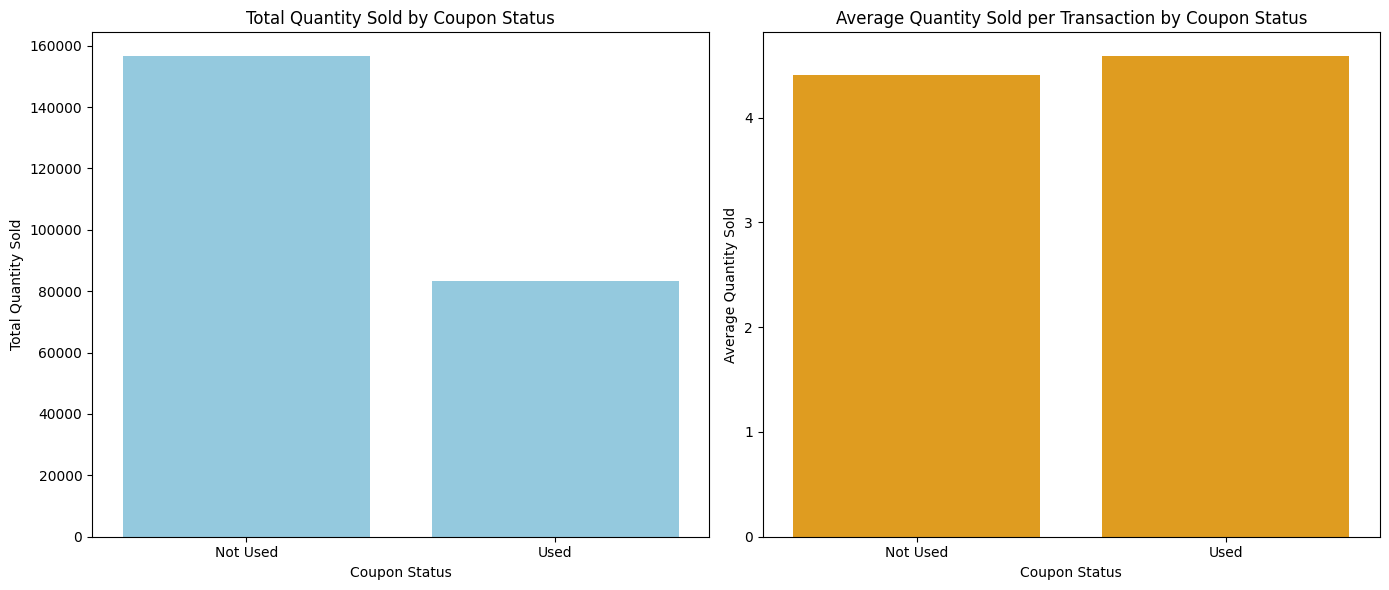

In [38]:
# Plot Total Quantity Sold
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=quantity_by_coupon, x='Coupon_Status', y='Total_Quantity_Sold', color='skyblue')
plt.title('Total Quantity Sold by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Total Quantity Sold')

# Plot Average Quantity Sold
plt.subplot(1, 2, 2)
sns.barplot(data=quantity_by_coupon, x='Coupon_Status', y='Avg_Quantity_Sold', color='orange')
plt.title('Average Quantity Sold per Transaction by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Average Quantity Sold')

plt.tight_layout()
plt.show()

In [39]:
# Calculate total and average revenue per unique transaction for each Coupon Status
revenue_by_coupon = sales_data.groupby('Coupon_Status').agg(
    Total_Revenue=('revenue', 'sum'),
    Avg_Revenue=('revenue', 'mean')
).reset_index()

revenue_by_coupon

,Coupon_Status,Total_Revenue,Avg_Revenue
0,Not Used,2.165453e+07,609.626088
1,Used,9.270896e+06,509.950280


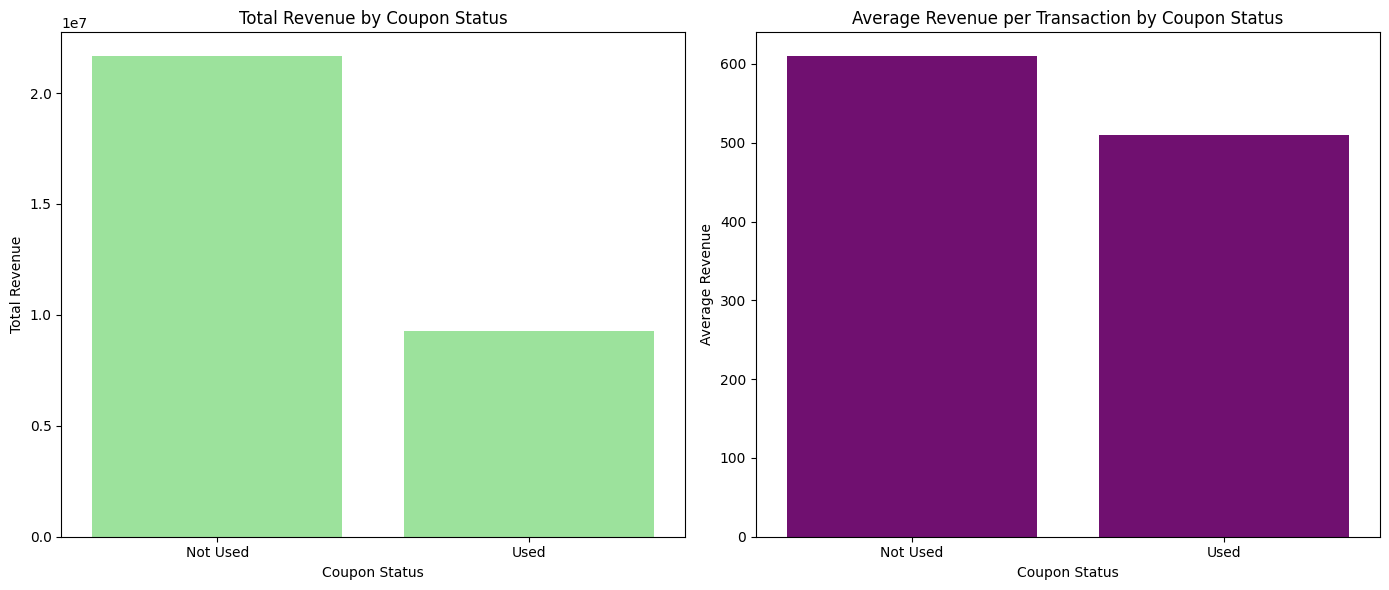

In [40]:
# Plot Total Revenue
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=revenue_by_coupon, x='Coupon_Status', y='Total_Revenue', color='lightgreen')
plt.title('Total Revenue by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Total Revenue')

# Plot Average Revenue per Transaction
plt.subplot(1, 2, 2)
sns.barplot(data=revenue_by_coupon, x='Coupon_Status', y='Avg_Revenue', color='purple')
plt.title('Average Revenue per Transaction by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Average Revenue')

plt.tight_layout()
plt.show()

In [41]:
# Calculate total transactions for each Coupon Status
transactions_by_coupon = sales_data.groupby('Coupon_Status').agg(
    Total_Transactions=('transaction_id', 'nunique')  # Unique transactions
).reset_index()

transactions_by_coupon

,Coupon_Status,Total_Transactions
0,Not Used,19455
1,Used,12258


/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/1209051000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=transactions_by_coupon, x='Coupon_Status', y='Total_Transactions', palette='Blues')


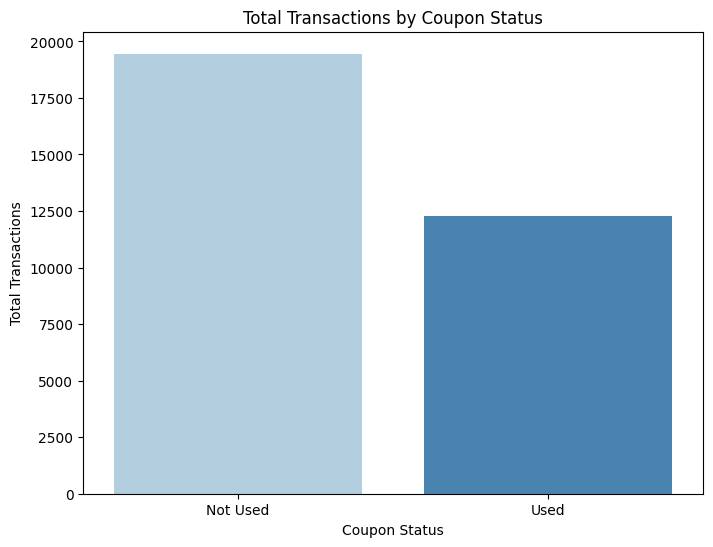

In [42]:
# Plot Total Transactions by Coupon Status
plt.figure(figsize=(8, 6))
sns.barplot(data=transactions_by_coupon, x='Coupon_Status', y='Total_Transactions', palette='Blues')
plt.title('Total Transactions by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Total Transactions')
plt.show()

In [43]:
# Identify repeat purchases by counting unique transactions for each user by Coupon Status
repeat_customers = sales_data.groupby(['user_id', 'Coupon_Status'])['transaction_id'].nunique().reset_index(name='Unique_Transactions')

# Determine customers with repeat purchases (more than one unique transaction)
repeat_customers['Is_Repeat_Customer'] = repeat_customers['Unique_Transactions'] > 1

# Calculate repeat purchase rate by Coupon Status
repeat_rate = repeat_customers.groupby('Coupon_Status')['Is_Repeat_Customer'].mean()
print("Repeat Purchase Rate by Coupon Status:")
print(repeat_rate)


Repeat Purchase Rate by Coupon Status:
Coupon_Status
Not Used    0.908333
Used        0.872635
Name: Is_Repeat_Customer, dtype: float64


/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/2793042413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=repeat_rate.index, y=repeat_rate.values, palette='viridis')


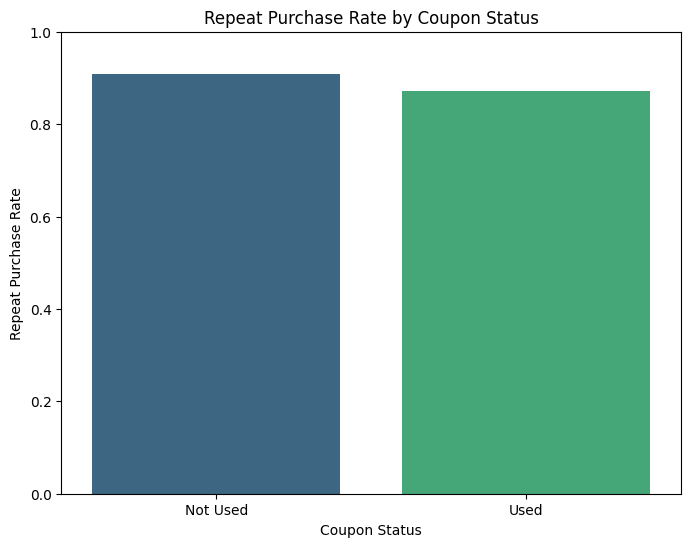

In [44]:
# Plot Repeat Purchase Rate by Coupon Status
plt.figure(figsize=(8, 6))
sns.barplot(x=repeat_rate.index, y=repeat_rate.values, palette='viridis')
plt.title('Repeat Purchase Rate by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Repeat Purchase Rate')
plt.ylim(0, 1)  # Since it's a rate, set y-axis to max 1 for better interpretation
plt.show()

In [45]:
# Calculate the average number of unique products purchased by coupon status
product_variety = sales_data.groupby(['user_id', 'Coupon_Status'])['product_id'].nunique().reset_index()
avg_product_variety = product_variety.groupby('Coupon_Status')['product_id'].mean()

print("Average Product Variety by Coupon Status:")
print(avg_product_variety)

Average Product Variety by Coupon Status:
Coupon_Status
Not Used    13.424306
Used         8.842795
Name: product_id, dtype: float64


/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/3464706297.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_product_variety.index, y=avg_product_variety.values, palette='plasma')


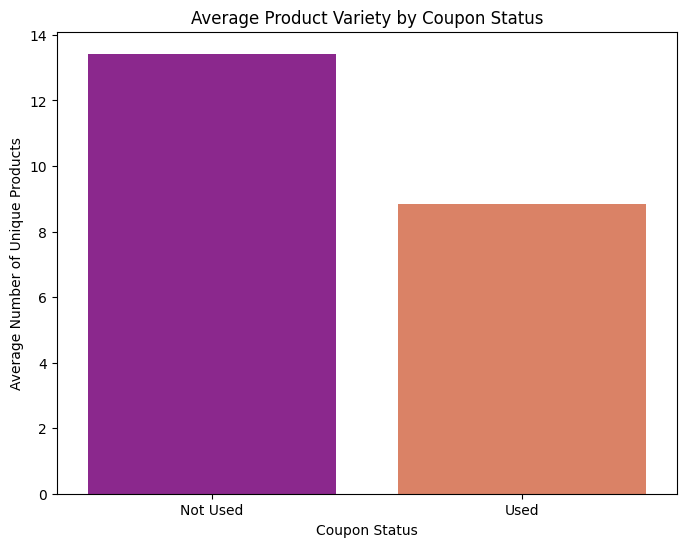

In [46]:
# Plot Average Product Variety by Coupon Status
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_product_variety.index, y=avg_product_variety.values, palette='plasma')
plt.title('Average Product Variety by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Average Number of Unique Products')
plt.show()

In [47]:
# Identify first-time customers
first_purchase = sales_data.groupby('user_id')['date'].min().reset_index()
sales_data = sales_data.merge(first_purchase, on='user_id', suffixes=('', '_first_purchase'))
sales_data['Is_First_Purchase'] = sales_data['date'] == sales_data['date_first_purchase']

# Calculate new customer rate by coupon status
new_customer_rate = sales_data.groupby('Coupon_Status')['Is_First_Purchase'].mean()
print("New Customer Rate by Coupon Status:")
print(new_customer_rate)

New Customer Rate by Coupon Status:
Coupon_Status
Not Used    0.493426
Used        0.487459
Name: Is_First_Purchase, dtype: float64


/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/4045920769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_customer_rate.index, y=new_customer_rate.values, palette='coolwarm')


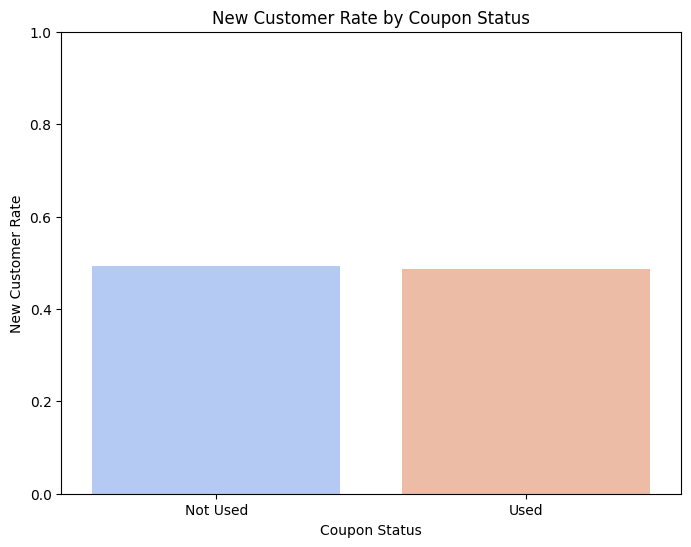

In [48]:
plt.figure(figsize=(8, 6))
sns.barplot(x=new_customer_rate.index, y=new_customer_rate.values, palette='coolwarm')
plt.title('New Customer Rate by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('New Customer Rate')
plt.ylim(0, 1)  # Since it's a rate, setting y-axis from 0 to 1 for better interpretation
plt.show()

### Analysis of the Usage of Promotional Campaigns on ROI and Revenue

In [49]:
# Calculate average ROI for each Coupon Status
roi_by_coupon = sales_data.groupby('Coupon_Status').agg(
    Avg_ROI=('ROI', 'mean')
).reset_index()

roi_by_coupon

,Coupon_Status,Avg_ROI
0,Not Used,4.718180
1,Used,3.918383


/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/840923246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roi_by_coupon, x='Coupon_Status', y='Avg_ROI', palette='cool')


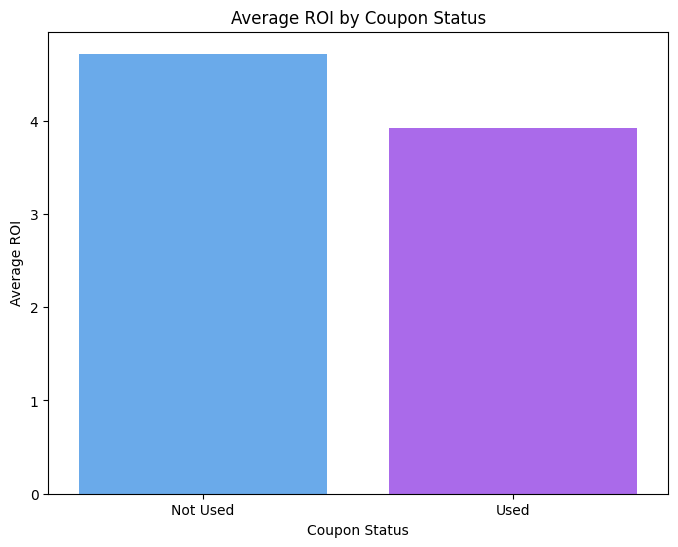

In [50]:
# Plot Average ROI by Coupon Status
plt.figure(figsize=(8, 6))
sns.barplot(data=roi_by_coupon, x='Coupon_Status', y='Avg_ROI', palette='cool')
plt.title('Average ROI by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Average ROI')
plt.show()

In [51]:
# Calculate average ROI_adjusted for each Coupon Status
roi_adjusted_by_coupon = sales_data.groupby('Coupon_Status').agg(
    Avg_ROI_Adjusted=('ROI_adjusted', 'mean')
).reset_index()

roi_adjusted_by_coupon

,Coupon_Status,Avg_ROI_Adjusted
0,Not Used,5.741309
1,Used,4.776382


/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/1921089843.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roi_adjusted_by_coupon, x='Coupon_Status', y='Avg_ROI_Adjusted', palette='magma')


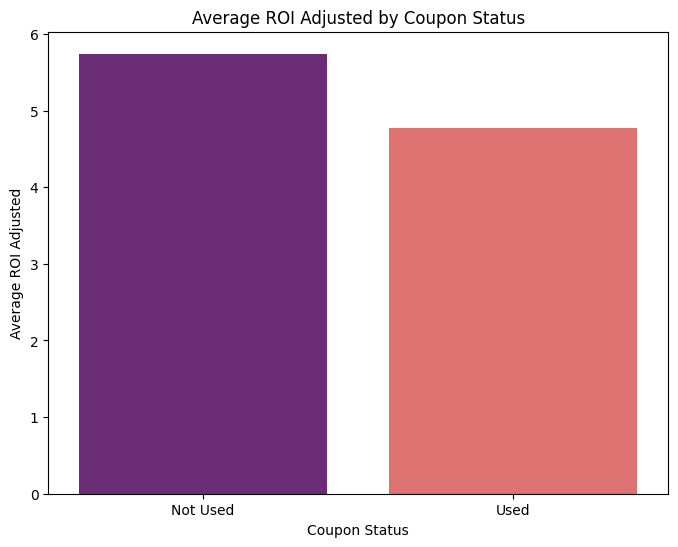

In [52]:
# Plot Average ROI_adjusted by Coupon Status
plt.figure(figsize=(8, 6))
sns.barplot(data=roi_adjusted_by_coupon, x='Coupon_Status', y='Avg_ROI_Adjusted', palette='magma')
plt.title('Average ROI Adjusted by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Average ROI Adjusted')
plt.show()

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/1132460969.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roi_by_coupon, x='Coupon_Status', y='Avg_ROI', palette='cool')
/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/1132460969.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roi_by_coupon, x='Coupon_Status', y='Avg_ROI_Adjusted', palette='cool')


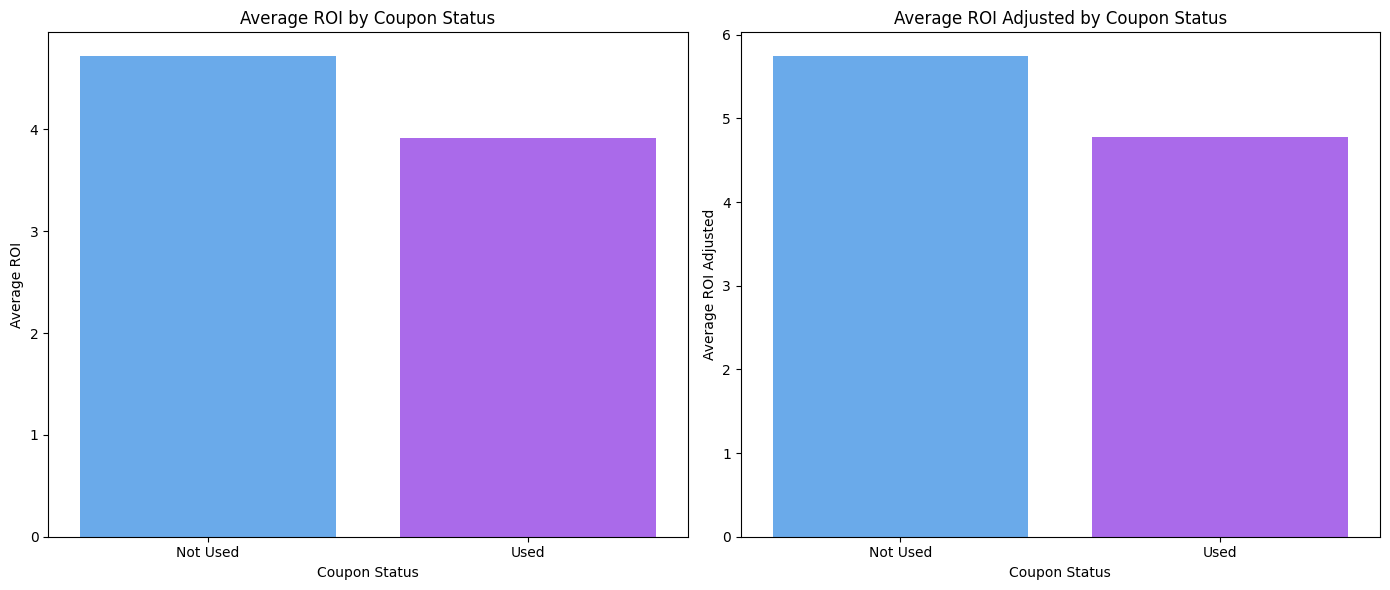

In [53]:
# Calculate average ROI and average ROI_adjusted for each Coupon Status
roi_by_coupon = sales_data.groupby('Coupon_Status').agg(
    Avg_ROI=('ROI', 'mean'),
    Avg_ROI_Adjusted=('ROI_adjusted', 'mean')
).reset_index()

# Create a side-by-side plot
plt.figure(figsize=(14, 6))

# Plot Average ROI by Coupon Status
plt.subplot(1, 2, 1)
sns.barplot(data=roi_by_coupon, x='Coupon_Status', y='Avg_ROI', palette='cool')
plt.title('Average ROI by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Average ROI')

# Plot Average ROI Adjusted by Coupon Status
plt.subplot(1, 2, 2)
sns.barplot(data=roi_by_coupon, x='Coupon_Status', y='Avg_ROI_Adjusted', palette='cool')
plt.title('Average ROI Adjusted by Coupon Status')
plt.xlabel('Coupon Status')
plt.ylabel('Average ROI Adjusted')

plt.tight_layout()
plt.show()

Observation: While promotions may encourage purchases, they seem to lower the ROI. This could imply that although coupons boost sales volume, they may not be as profitable when ROI is taken into account. If the goal of Amazon is to maximize ROI, it might be beneficial to reconsider the scale or structure of coupon-based promotions. However, if the goal is more customer engagement or market share, promotions might still be justified despite a lower ROI. From the previous section, coupon usage has led to increased quantity purchased per transaction, which shows that coupon usage can promote more market share and customer loyalty.

### Analysis of Seasonality Usage of Coupons on Revenue

In [54]:
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['Month'] = sales_data['date'].dt.month

# Calculate monthly averages for ROI, ROI_adjusted, and ROI_seasonal_adjusted by coupon status
monthly_metrics = sales_data.groupby(['Month', 'Coupon_Status']).agg(
    Avg_ROI=('ROI', 'mean'),
    Avg_ROI_Adjusted=('ROI_adjusted', 'mean'),
    Avg_ROI_Seasonal_Adjusted=('ROI_seasonal_adjusted', 'mean')
).reset_index()

monthly_metrics

,Month,Coupon_Status,Avg_ROI,Avg_ROI_Adjusted,Avg_ROI_Seasonal_Adjusted
0,1,Not Used,7.436192,9.101731,9.101731
1,1,Used,6.639659,8.165969,8.165969
2,2,Not Used,4.149170,5.029548,5.029548
3,2,Used,3.284195,3.949054,3.949054
4,3,Not Used,2.856097,3.476836,3.476836
5,3,Used,2.006754,2.456916,2.456916
6,4,Not Used,7.258792,8.816026,8.816026
7,4,Used,6.446770,7.845117,7.845117
8,5,Not Used,3.972163,4.837125,4.837125
9,5,Used,3.169429,3.891573,3.891573


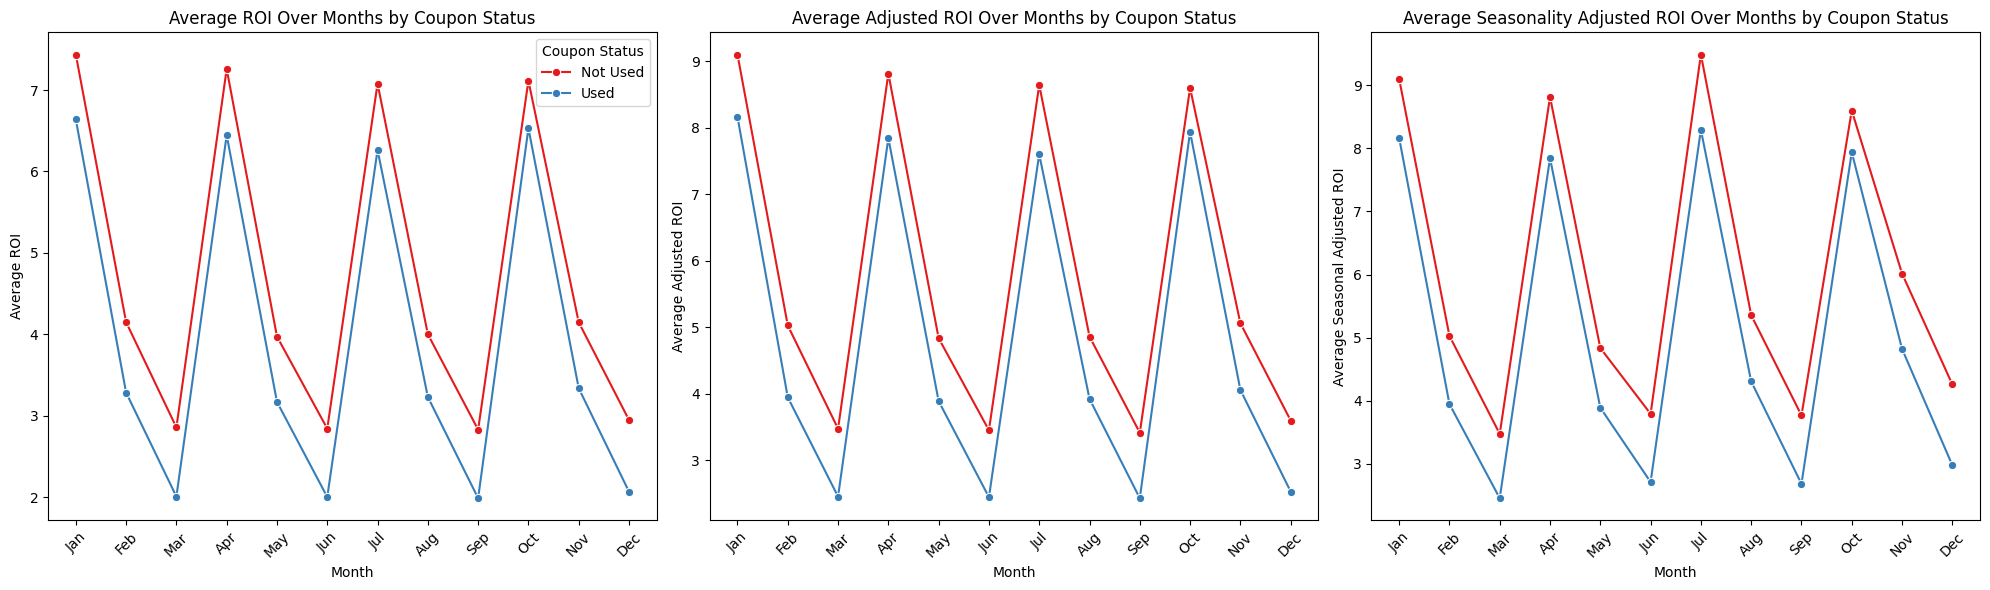

In [55]:
# Set up a wider figure with more spacing between subplots
plt.figure(figsize=(20, 6))

# Plot Average ROI by Month
plt.subplot(1, 3, 1)
sns.lineplot(data=monthly_metrics, x='Month', y='Avg_ROI', hue='Coupon_Status', marker='o', palette='Set1')
plt.title('Average ROI Over Months by Coupon Status')
plt.xlabel('Month')
plt.ylabel('Average ROI')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Coupon Status')

# Plot Average Adjusted ROI by Month
plt.subplot(1, 3, 2)
sns.lineplot(data=monthly_metrics, x='Month', y='Avg_ROI_Adjusted', hue='Coupon_Status', marker='o', palette='Set1')
plt.title('Average Adjusted ROI Over Months by Coupon Status')
plt.xlabel('Month')
plt.ylabel('Average Adjusted ROI')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend([],[], frameon=False)  # Hide legend to avoid repetition

# Plot Average Seasonality Adjusted ROI by Month
plt.subplot(1, 3, 3)
sns.lineplot(data=monthly_metrics, x='Month', y='Avg_ROI_Seasonal_Adjusted', hue='Coupon_Status', marker='o', palette='Set1')
plt.title('Average Seasonality Adjusted ROI Over Months by Coupon Status')
plt.xlabel('Month')
plt.ylabel('Average Seasonal Adjusted ROI')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend([],[], frameon=False)  # Hide legend to avoid repetition

plt.tight_layout()
plt.show()


Observation: 
1. Higher ROI with No Coupon Usage: Across all three ROI metrics, the lines for "Not Used" consistently have higher values compared to "Used". This suggests that, on average, transactions where no coupon was used yielded a higher ROI. This might be due to the reduction in revenue associated with coupon discounts.
2. Impact of Adjusted ROI Metrics: Both the Adjusted ROI and Seasonally Adjusted ROI follow similar patterns to the unadjusted ROI, though they tend to have higher peaks. This suggests that when seasonality and specific marketing adjustments are factored in, the impact of promotional campaigns might be more favorable. The adjustments might help account for variations that impact baseline ROI.

Marketing Strategy:
1. During High ROI Periods: March, July, and October appear to be strong months in terms of ROI, suggesting these could be good months to leverage without relying heavily on discounts or coupons.
2. Coupon Strategy Adjustment: Since coupon usage correlates with lower ROI, it may be worth investigating the specific types or values of coupons used during these months to optimize for better returns.

### Analysis of Coupon Usage in Different Marketing Channels

In [56]:
coupon_usage = sales_data.groupby(['marketing_channel', 'Coupon_Status']).size().reset_index(name='Transaction_Count')
coupon_usage_pivot = coupon_usage.pivot(index='marketing_channel', columns='Coupon_Status', values='Transaction_Count').fillna(0)

# Calculate the percentage of "Used" and "Not Used" for each marketing channel
coupon_usage_pivot['Used_Percentage'] = coupon_usage_pivot['Used'] / (coupon_usage_pivot['Used'] + coupon_usage_pivot['Not Used']) * 100
coupon_usage_pivot['Not_Used_Percentage'] = coupon_usage_pivot['Not Used'] / (coupon_usage_pivot['Used'] + coupon_usage_pivot['Not Used']) * 100

coupon_usage_pivot = coupon_usage_pivot.reset_index()
coupon_usage_pivot

Coupon_Status,marketing_channel,Not Used,Used,Used_Percentage,Not_Used_Percentage
0,Affiliate Program,3554,1767,33.208044,66.791956
1,Amazon Display Ads,3613,1779,32.993323,67.006677
2,Amazon Search Ads,3445,1842,34.840174,65.159826
3,Deals and Coupons,3583,1927,34.972777,65.027223
4,Email Campaign,3472,1786,33.967288,66.032712
5,Influencer Marketing,3629,1807,33.241354,66.758646
6,Referral Program,3505,1833,34.338704,65.661296
7,SEO,3568,1790,33.407988,66.592012
8,Sponsored Brands,3480,1842,34.611048,65.388952
9,Video Ads (Amazon OTT),3672,1807,32.980471,67.019529


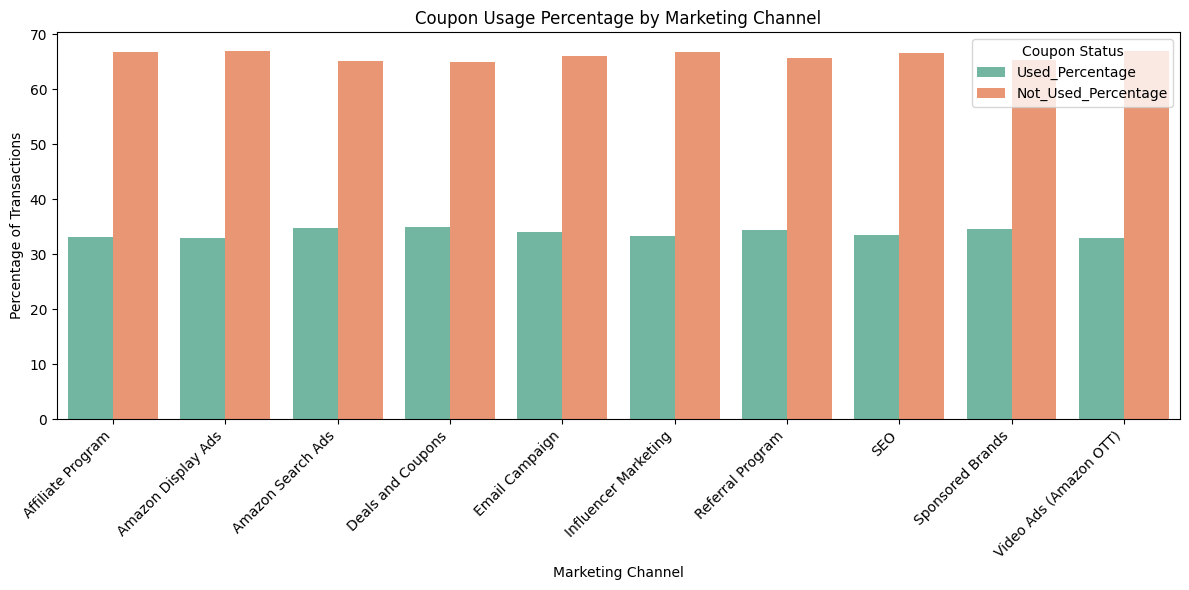

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(data=coupon_usage_pivot.melt(id_vars='marketing_channel', value_vars=['Used_Percentage', 'Not_Used_Percentage'], 
                                         var_name='Coupon_Status', value_name='Percentage'),
            x='marketing_channel', y='Percentage', hue='Coupon_Status', palette='Set2')

plt.title('Coupon Usage Percentage by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Percentage of Transactions')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Coupon Status')
plt.tight_layout()
plt.show()

In [58]:
# Group data by marketing channel and coupon status, and calculate the average ROI metrics
channel_roi = sales_data.groupby(['marketing_channel', 'Coupon_Status']).agg(
    Avg_ROI=('ROI', 'mean'),
    Avg_ROI_Adjusted=('ROI_adjusted', 'mean'),
    Avg_ROI_Seasonal_Adjusted=('ROI_seasonal_adjusted', 'mean')
).reset_index()

channel_roi

,marketing_channel,Coupon_Status,Avg_ROI,Avg_ROI_Adjusted,Avg_ROI_Seasonal_Adjusted
0,Affiliate Program,Not Used,4.739496,5.216959,5.334839
1,Affiliate Program,Used,3.966608,4.354290,4.457880
2,Amazon Display Ads,Not Used,4.692109,3.751924,4.015524
3,Amazon Display Ads,Used,3.950290,3.170193,3.379245
4,Amazon Search Ads,Not Used,4.684554,6.552232,7.342869
5,Amazon Search Ads,Used,3.928508,5.485117,6.034895
6,Deals and Coupons,Not Used,4.763588,4.285677,4.285677
7,Deals and Coupons,Used,3.924292,3.538401,3.538401
8,Email Campaign,Not Used,4.760861,6.179221,6.862342
9,Email Campaign,Used,3.865377,5.020947,5.569418


/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/32290432.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(channel_roi['marketing_channel'].unique(), rotation=45, ha='right')
/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/32290432.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(channel_roi['marketing_channel'].unique(), rotation=45, ha='right')
/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/32290432.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(channel_roi['marketing_channel'].unique(), rotation=45, ha='right')


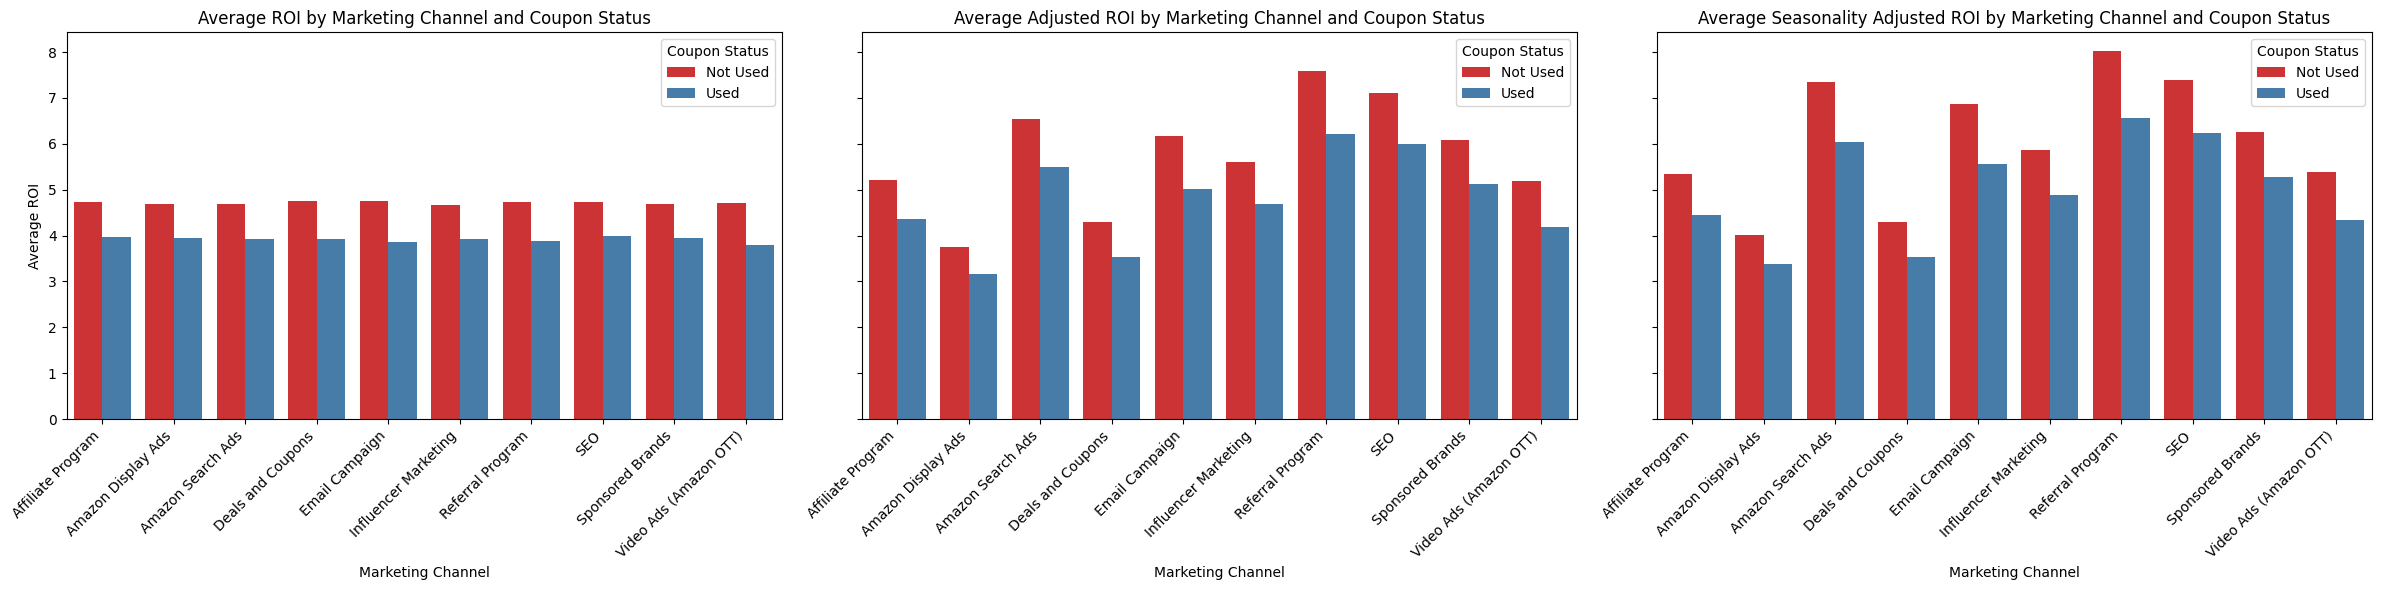

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6), sharey=True)

# Plot Average ROI by Marketing Channel and Coupon Status
sns.barplot(data=channel_roi, x='marketing_channel', y='Avg_ROI', hue='Coupon_Status', ax=axes[0], palette='Set1')
axes[0].set_title('Average ROI by Marketing Channel and Coupon Status')
axes[0].set_xlabel('Marketing Channel')
axes[0].set_ylabel('Average ROI')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Coupon Status')

# Plot Average Adjusted ROI by Marketing Channel and Coupon Status
sns.barplot(data=channel_roi, x='marketing_channel', y='Avg_ROI_Adjusted', hue='Coupon_Status', ax=axes[1], palette='Set1')
axes[1].set_title('Average Adjusted ROI by Marketing Channel and Coupon Status')
axes[1].set_xlabel('Marketing Channel')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Coupon Status')

# Plot Average Seasonality Adjusted ROI by Marketing Channel and Coupon Status
sns.barplot(data=channel_roi, x='marketing_channel', y='Avg_ROI_Seasonal_Adjusted', hue='Coupon_Status', ax=axes[2], palette='Set1')
axes[2].set_title('Average Seasonality Adjusted ROI by Marketing Channel and Coupon Status')
axes[2].set_xlabel('Marketing Channel')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(title='Coupon Status')

for ax in axes:
    ax.set_xticklabels(channel_roi['marketing_channel'].unique(), rotation=45, ha='right')

plt.tight_layout()
plt.show()



### Analysis of Coupon Usage in Different User Demographics

In [60]:
# Group by age
bins = [18, 25, 35, 45, 55, 65, 100]  # Age ranges
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
sales_data['age_group'] = pd.cut(sales_data['age'], bins=bins, labels=labels, right=False)

age_coupon_usage = sales_data.groupby(['age_group', 'Coupon_Status']).size().reset_index(name='Transaction_Count')

age_coupon_usage

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/1910895176.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_coupon_usage = sales_data.groupby(['age_group', 'Coupon_Status']).size().reset_index(name='Transaction_Count')


,age_group,Coupon_Status,Transaction_Count
0,18-25,Not Used,5553
1,18-25,Used,2922
2,26-35,Not Used,9427
3,26-35,Used,4768
4,36-45,Not Used,7996
5,36-45,Used,4045
6,46-55,Not Used,8644
7,46-55,Used,4406
8,56-65,Not Used,3901
9,56-65,Used,2039


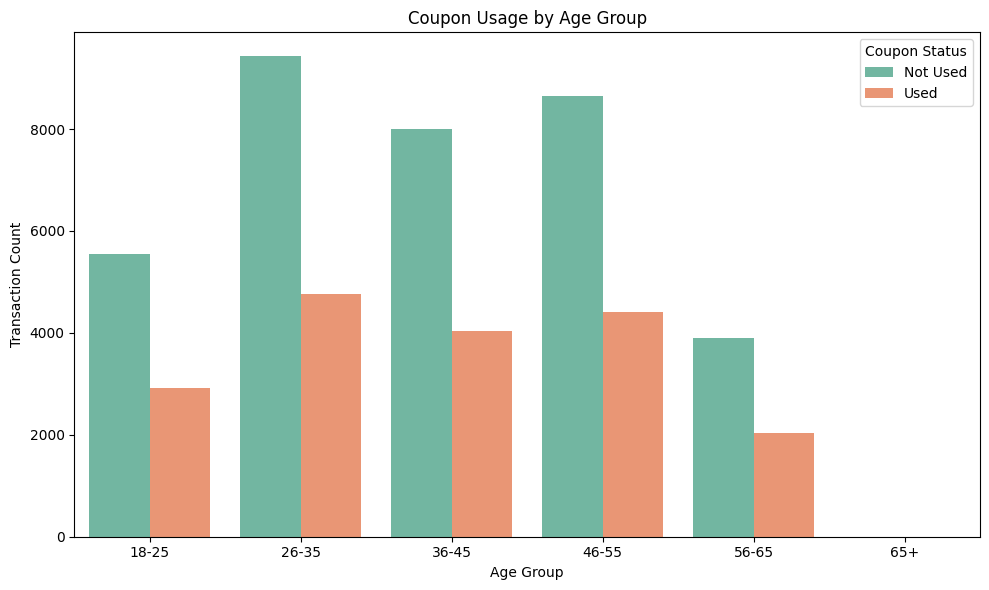

In [61]:
# Plot of coupon usage with age
plt.figure(figsize=(10, 6))
sns.barplot(data=age_coupon_usage, x='age_group', y='Transaction_Count', hue='Coupon_Status', palette='Set2')

plt.title('Coupon Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Transaction Count')
plt.legend(title='Coupon Status')
plt.tight_layout()
plt.show()

Observation:
1. Higher Coupon Usage in Younger Age Groups: The age groups 18-25, 26-35, and 36-45 show a higher percentage of transactions where coupons were used. These younger age groups may be more responsive to promotions or inclined to use discounts.
2. Declining Coupon Usage with Age: As we move to older age groups (46-55 and 56-65), the percentage of transactions with coupon usage decreases. This suggests that older age groups may be less likely to use coupons or may respond differently to promotions.
3. Most Active Age Groups: The 26-35 and 46-55 age groups have the highest transaction counts overall (both "Used" and "Not Used"). These age groups are potentially the most engaged with the platform, making them key targets for any campaigns aiming to increase transactions.
4. Potential for Targeted Campaigns: Since younger age groups seem more responsive to coupon usage, targeted promotions could be designed to further enhance engagement with these groups. Meanwhile, different strategies might be needed for older age groups, who seem less inclined to use coupons.

In [62]:
# Group by gender
gender_coupon_usage = sales_data.groupby(['gender', 'Coupon_Status']).size().reset_index(name='Transaction_Count')

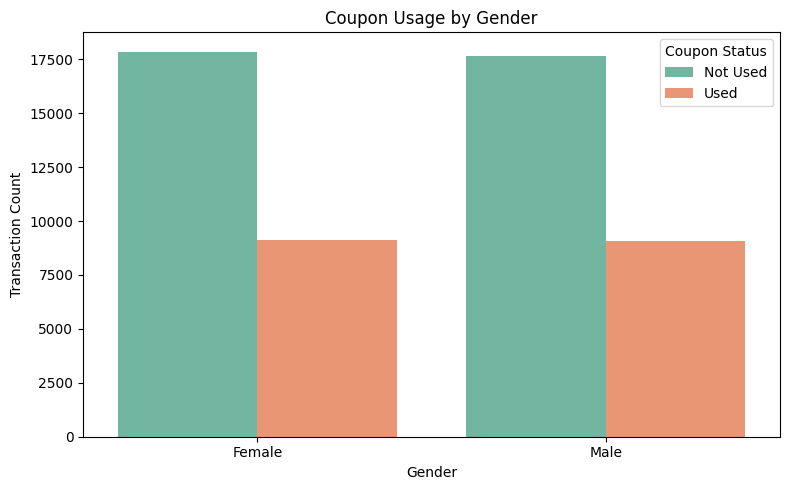

In [63]:
# Plot of coupon usage with gender
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_coupon_usage, x='gender', y='Transaction_Count', hue='Coupon_Status', palette='Set2')

plt.title('Coupon Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Transaction Count')
plt.legend(title='Coupon Status')
plt.tight_layout()
plt.show()

Observation: The relative proportions of "Used" to "Not Used" transactions seem similar for both genders, indicating that gender might not play a strong role in determining coupon usage behavior.

### Analysis of Different Amount of Discount on Sales

In [64]:
# Group by Discount_pct to calculate metrics
discount_metrics = sales_data.groupby('Discount_pct').agg({
    'revenue': 'sum',  
    'ROI': 'mean',    
    'ROI_adjusted': 'mean',
    'ROI_seasonal_adjusted': 'mean' 
}).reset_index()

# Rename columns for clarity
discount_metrics.columns = ['Discount Percentage', 'Total Revenue', 'Average ROI', 'Average Adjusted ROI', 'Average Seasonal Adjusted ROI']

discount_metrics

,Discount Percentage,Total Revenue,Average ROI,Average Adjusted ROI,Average Seasonal Adjusted ROI
0,0.1,1.120385e+07,6.955642,8.470805,8.706233
1,0.2,9.902110e+06,3.782208,4.600900,4.951133
2,0.3,9.819463e+06,2.579400,3.141878,3.448741


/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/3697174191.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_metrics, x='Discount Percentage', y='Total Revenue', palette="Blues")


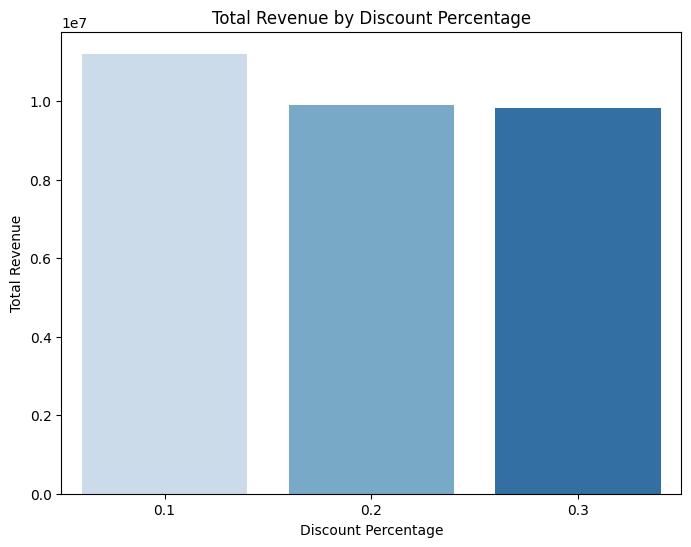

In [65]:
# Plot total revenue by discount percentage
plt.figure(figsize=(8, 6))
sns.barplot(data=discount_metrics, x='Discount Percentage', y='Total Revenue', palette="Blues")
plt.title('Total Revenue by Discount Percentage')
plt.ylabel('Total Revenue')
plt.xlabel('Discount Percentage')
plt.show()

Observations:
1. Higher Revenue at Lower Discount: It appears that the 10% discount has generated the highest total revenue compared to 20% and 30% discounts. This suggests that while the higher discount rates may appeal to some customers, they do not necessarily lead to a proportional increase in total revenue.
2. Decline with Increased Discount: The total revenue slightly decreases as the discount percentage increases. This could imply that the increased discount does not attract a sufficiently larger volume of transactions to offset the lower price per sale, resulting in a lower total revenue.
3. Price Sensitivity: Customers may be less price-sensitive than anticipated, meaning that higher discounts are not as effective in boosting sales volume to the extent necessary to increase overall revenue.

/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/2630996230.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_metrics, x='Discount Percentage', y='Average ROI', ax=axes[0], palette="Greens")
/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/2630996230.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_metrics, x='Discount Percentage', y='Average Adjusted ROI', ax=axes[1], palette="Purples")
/var/folders/cr/yg8f_zlx5w1_6mw1x0jdd6mr0000gn/T/ipykernel_34448/2630996230.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fals

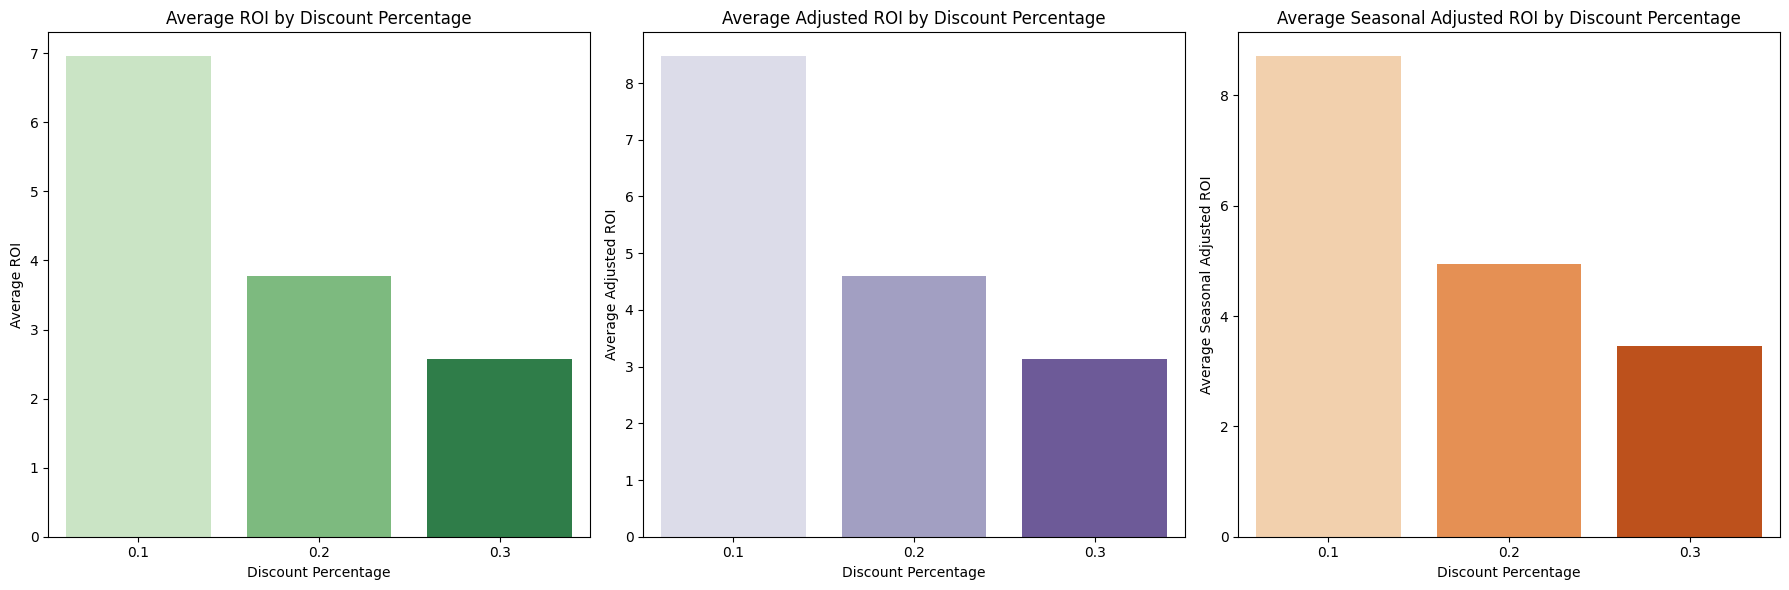

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot average ROI by discount percentage
sns.barplot(data=discount_metrics, x='Discount Percentage', y='Average ROI', ax=axes[0], palette="Greens")
axes[0].set_title('Average ROI by Discount Percentage')
axes[0].set_ylabel('Average ROI')
axes[0].set_xlabel('Discount Percentage')

# Plot average adjusted ROI by discount percentage
sns.barplot(data=discount_metrics, x='Discount Percentage', y='Average Adjusted ROI', ax=axes[1], palette="Purples")
axes[1].set_title('Average Adjusted ROI by Discount Percentage')
axes[1].set_ylabel('Average Adjusted ROI')
axes[1].set_xlabel('Discount Percentage')

# Plot average seasonal adjusted ROI by discount percentage
sns.barplot(data=discount_metrics, x='Discount Percentage', y='Average Seasonal Adjusted ROI', ax=axes[2], palette="Oranges")
axes[2].set_title('Average Seasonal Adjusted ROI by Discount Percentage')
axes[2].set_ylabel('Average Seasonal Adjusted ROI')
axes[2].set_xlabel('Discount Percentage')

# Adjust layout for clarity
plt.tight_layout()
plt.show()

Observation:
1. ROI Decline with Higher Discounts: Across all three ROI metrics, the 10% discount consistently yields the highest ROI, followed by the 20% discount, and then the 30% discount. This pattern indicates that a smaller discount percentage is associated with higher profitability relative to costs. As discounts increase, the ROI metrics decline, which suggests that higher discounts may erode profitability without proportionately increasing the benefits or sales volume.
2. Price Sensitivity and ROI Impact: This trend could indicate that customers are not significantly more responsive to higher discounts as higher discounts do not result in enough additional sales to compensate for the lower per-unit profitability.